In [248]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import sklearn.metrics

pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [15]:
# 84575189_0_6365692015941409487 -> no matches at all
data = pd.read_csv('/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/14067031_0_559833072073397908.csv')
data

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score
0,0,0,Algeria,Q80408,Algeria|Beni Saf,exact-match,15.249630,Q262,Algeria,-1,0.778565,0.303510
1,0,0,Algeria,Q2646480,Algeria,exact-match,14.653891,Q262,Algeria,-1,0.665114,0.218665
2,0,0,Algeria,Q262,Algeria|ALG|dz|🇩🇿|People’s Democratic Republic...,exact-match,14.653891,Q262,Algeria,1,0.853447,0.660131
3,0,0,Algeria,Q14955184,Algeria,exact-match,14.653891,Q262,Algeria,-1,0.650615,0.423400
4,0,0,Algeria,Q45136024,Wakālah al-Waṭanīyah li-Tanmiyat al-Baḥth al-J...,exact-match,13.415021,Q262,Algeria,-1,0.702936,0.435100
...,...,...,...,...,...,...,...,...,...,...,...,...
320,0,50,Uganda,Q14510479,Uganda,exact-match,14.738804,Q1036,Uganda,-1,0.633964,0.420166
321,0,50,Uganda,Q14158587,Uganda,exact-match,14.738804,Q1036,Uganda,-1,NaN,NaN
322,0,50,Uganda,Q7877575,Commonwealth realm of Uganda|Uganda,exact-match,13.190948,Q1036,Uganda,-1,0.843179,0.501244
323,0,51,Zambia,Q953,Zambia|🇿🇲|Republic of Zambia|ZAM|zm,exact-match,15.078144,Q953,Zambia,1,0.942304,0.711131


In [103]:
data = data.fillna('')
data

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score
0,0,0,Algeria,Q80408,Algeria|Beni Saf,exact-match,15.249630,Q262,Algeria,-1,0.778565,0.30351
1,0,0,Algeria,Q2646480,Algeria,exact-match,14.653891,Q262,Algeria,-1,0.665114,0.218665
2,0,0,Algeria,Q262,Algeria|ALG|dz|🇩🇿|People’s Democratic Republic...,exact-match,14.653891,Q262,Algeria,1,0.853447,0.660131
3,0,0,Algeria,Q14955184,Algeria,exact-match,14.653891,Q262,Algeria,-1,0.650615,0.4234
4,0,0,Algeria,Q45136024,Wakālah al-Waṭanīyah li-Tanmiyat al-Baḥth al-J...,exact-match,13.415021,Q262,Algeria,-1,0.702936,0.4351
...,...,...,...,...,...,...,...,...,...,...,...,...
320,0,50,Uganda,Q14510479,Uganda,exact-match,14.738804,Q1036,Uganda,-1,0.633964,0.420166
321,0,50,Uganda,Q14158587,Uganda,exact-match,14.738804,Q1036,Uganda,-1,,
322,0,50,Uganda,Q7877575,Commonwealth realm of Uganda|Uganda,exact-match,13.190948,Q1036,Uganda,-1,0.843179,0.501244
323,0,51,Zambia,Q953,Zambia|🇿🇲|Republic of Zambia|ZAM|zm,exact-match,15.078144,Q953,Zambia,1,0.942304,0.711131


### Which is better text embedding or graph embedding?

In [17]:
# define this question 
data[(data['kg_id'] == data['GT_kg_id']) & (data['kg_id'] != '')]

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score
2,0,0,Algeria,Q262,Algeria|ALG|dz|🇩🇿|People’s Democratic Republic...,exact-match,14.653891,Q262,Algeria,1,0.853447,0.660131
7,0,1,Angola,Q916,Angola|ANG|ao|🇦🇴|Ngola|Republic of Angola,exact-match,15.026483,Q916,Angola,1,0.958811,0.696275
20,0,2,Benin,Q962,Benin|BEN|bj|Dahomey|🇧🇯|Republic of Benin,exact-match,15.078144,Q962,Benin,1,0.924437,0.688655
24,0,4,Burkina Faso,Q965,Burkina Faso|bf|🇧🇫,exact-match,15.078144,Q965,Burkina Faso,1,0.924307,0.627065
26,0,5,Burundi,Q967,Burundi|BDI|bi|🇧🇮|Gouvernement du Burundi|Repu...,exact-match,15.078144,Q967,Burundi,1,0.86648,0.689503
32,0,6,Cameroon,Q1009,Cameroon|CAM|cm|CMR|🇨🇲|Republic of Cameroon,exact-match,15.249630,Q1009,Cameroon,1,0.915926,0.635832
37,0,7,Cape Verde,Q1011,Cape Verde|Cabo Verde|CPV|cv|CV|🇨🇻|Republic of...,exact-match,15.249630,Q1011,Cape Verde,1,0.774155,0.698444
40,0,8,Central African Republic,Q929,Central African Republic|CAF|CAR|Centrafrique|...,exact-match,14.943761,Q929,Central African Republic,1,0.91405,0.652469
55,0,9,Chad,Q657,Chad|CHA|🇹🇩|GUM|Ǧumhūriyyat Tšād|Republic of C...,exact-match,13.719985,Q657,Chad,1,0.931703,0.680678
59,0,10,Comoros,Q970,Comoros|al-Ittiḥād al-Qumurī|COM|🇰🇲|Juzur al-Q...,exact-match,14.990362,Q970,Comoros,1,0.827104,0.637


### By cell linking task. Count/compute
- Number of tasks
- Number and fraction of tasks with known ground truth
- Number and fraction of tasks with ground truth in the candidate set
- Number and fraction of singleton candidate sets
- Number and fraction of singleton candidate sets containing ground truth
- Top-1 accuracy, Top-5 accuracy and NDCG using retrieval_score, text-embedding-score and graph-embedding-score. In our case with binary relevance I think NDCG is the same as DCG.
- Average Top-1, Top-5 and NDCG metrics

In [19]:
row_idx, col_idx = 2, 0

relevant_df = data[(data['column'] == col_idx) & (data['row'] == row_idx) & (data['kg_id'] != '')]

num_tasks = len(relevant_df)
num_tasks

5

In [20]:
num_tasks_known_gt = len(relevant_df[relevant_df['GT_kg_id'] != ''])
num_tasks_known_gt

5

In [21]:
is_gt_in_candidate = len(relevant_df[relevant_df['GT_kg_id'] == relevant_df['kg_id']])
is_gt_in_candidate

1

In [22]:
is_candidate_set_singleton = len(relevant_df) == 1
is_candidate_set_singleton

False

In [27]:
is_top_one_accurate = False
top_one_row = relevant_df.iloc[0]
if top_one_row['kg_id'] == top_one_row['GT_kg_id']:
    is_top_one_accurate = True
is_top_one_accurate

False

In [31]:
is_top_five_accurate = False
top_five_rows = relevant_df.iloc[0:5]
for i, row in top_five_rows.iterrows():
    if row['kg_id'] == row['GT_kg_id']:
        is_top_five_accurate = True
is_top_five_accurate

True

In [33]:
is_top_ten_accurate = False
top_ten_rows = relevant_df.iloc[0:10]
for i, row in top_ten_rows.iterrows():
    if row['kg_id'] == row['GT_kg_id']:
        is_top_ten_accurate = True
is_top_ten_accurate

True

In [106]:
# parse eval file
def parse_eval_file_stats(file_name=None, eval_data=None):
    if file_name is not None and eval_data is None:
        eval_data = pd.read_csv(file_name)
        eval_data = eval_data.fillna('')
    parsed_eval_data = {}
    for ei, erow in eval_data.iterrows():
        if 'table_id' not in erow:
            table_id = file_name.split('/')[-1].split('.csv')[0]
        else:
            table_id = erow['table_id']
        
        row_idx, col_idx = erow['row'], erow['column']
        if (table_id, row_idx, col_idx) in parsed_eval_data:
            continue
        relevant_df = eval_data[(eval_data['column'] == col_idx) & (eval_data['row'] == row_idx) & (eval_data['kg_id'] != '')]
        
        if len(relevant_df) == 0:
            parsed_eval_data[(row_idx, col_idx)] = {
                'table_id': table_id,
                'GT_kg_id': erow['GT_kg_id'],
                'row': row_idx,
                'column': col_idx,
                'num_candidate': 0,
                'num_candidate_known_gt': 0,
                'is_gt_in_candidate': False,
                'is_candidate_set_singleton': False,
                'is_top_one_accurate': False,
                'is_top_five_accurate': False
            }
            continue
        
        row_col_stats = {}
        row_col_stats['table_id'] = table_id
        row_col_stats['GT_kg_id'] = erow['GT_kg_id']
        row_col_stats['row'] = erow['row']
        row_col_stats['column'] = erow['column']
        row_col_stats['num_candidate'] = len(relevant_df)
        row_col_stats['num_candidate_known_gt'] = len(relevant_df[relevant_df['GT_kg_id'] != ''])
        row_col_stats['is_gt_in_candidate'] = len(relevant_df[relevant_df['GT_kg_id'] == relevant_df['kg_id']]) > 0
        row_col_stats['is_candidate_set_singleton'] = len(relevant_df) == 1

        is_top_one_accurate = False
        top_one_row = relevant_df.iloc[0]
        if top_one_row['kg_id'] == top_one_row['GT_kg_id']:
            is_top_one_accurate = True
        row_col_stats['is_top_one_accurate'] = is_top_one_accurate
        
        is_top_five_accurate = False
        top_five_rows = relevant_df.iloc[0:5]
        for i, row in top_five_rows.iterrows():
            if row['kg_id'] == row['GT_kg_id']:
                is_top_five_accurate = True
        row_col_stats['is_top_five_accurate'] = is_top_five_accurate
        
        parsed_eval_data[(table_id, row_idx, col_idx)] = row_col_stats
    return parsed_eval_data

In [108]:
e_data = parse_eval_file_stats(file_name='/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/84575189_0_6365692015941409487.csv')
len(e_data), e_data[("84575189_0_6365692015941409487", 0, 2)]

(100,
 {'table_id': '84575189_0_6365692015941409487',
  'GT_kg_id': 'Q192864',
  'row': 0,
  'column': 2,
  'num_candidate': 14,
  'num_candidate_known_gt': 14,
  'is_gt_in_candidate': False,
  'is_candidate_set_singleton': False,
  'is_top_one_accurate': False,
  'is_top_five_accurate': False})

In [110]:
e_data = parse_eval_file_stats(eval_data=all_data)
len(e_data), e_data[("84575189_0_6365692015941409487", 0, 2)]

(804,
 {'table_id': '84575189_0_6365692015941409487',
  'GT_kg_id': 'Q192864',
  'row': 0,
  'column': 2,
  'num_candidate': 14,
  'num_candidate_known_gt': 14,
  'is_gt_in_candidate': False,
  'is_candidate_set_singleton': False,
  'is_top_one_accurate': False,
  'is_top_five_accurate': False})

In [127]:
import json
with open('./eval_all.json', 'w') as f:
    json.dump(list(e_data.values()), f, indent=4)

In [78]:
import json
with open('./eval_14067031_0_559833072073397908.json', 'w') as f:
    json.dump(list(e_data.values()), f, indent=4)

In [80]:
len([k for k in e_data if e_data[k]['is_gt_in_candidate']])

0

In [87]:
import os

eval_file_names = []

for (dirpath, dirnames, filenames) in os.walk('/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/'):
    for fn in filenames:
        if "csv" not in fn:
            continue
        abs_fn = dirpath + fn
        assert os.path.isfile(abs_fn)
        if os.path.getsize(abs_fn) == 0:
            continue
        eval_file_names.append(abs_fn)
len(eval_file_names)

9

In [88]:
eval_file_names

['/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/39759273_0_1427898308030295194.csv',
 '/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/45073662_0_3179937335063201739.csv',
 '/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/29414811_2_4773219892816395776.csv',
 '/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/84575189_0_6365692015941409487.csv',
 '/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/14380604_4_3329235705746762392.csv',
 '/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/52299421_0_4473286348258170200.csv',
 '/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/50270082_0_444360818941411589.csv',
 '/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/28086084_0_3127660530989916727.csv',
 '/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_ev

In [135]:
# merge all eval files in one df

def merge_df(file_names: list):
    df_list = []
    for fn in file_names:
        fid = fn.split('/')[-1].split('.csv')[0]
        df = pd.read_csv(fn)
        df['table_id'] = fid
        # df = df.fillna('')
        df_list.append(df)
    
    return pd.concat(df_list)

In [136]:
all_data = merge_df(eval_file_names)
all_data

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score,table_id
0,1,0,The Social Network,Q185888,The Social Network|Social Network,exact-match,15.537309,Q185888,The Social Network,1,0.738193,0.835313,39759273_0_1427898308030295194
1,1,0,The Social Network,Q16353709,The Social Network,exact-match,15.454587,Q185888,The Social Network,-1,0.496725,0.438745,39759273_0_1427898308030295194
2,1,1,Inception,Q52289851,Inception|IMO 1009704,exact-match,15.537309,Q25188,Inception,-1,0.695021,0.354292,39759273_0_1427898308030295194
3,1,1,Inception,Q54888301,Inception,exact-match,15.454587,Q25188,Inception,-1,0.434652,0.412163,39759273_0_1427898308030295194
4,1,1,Inception,Q25188,Inception,exact-match,14.990362,Q25188,Inception,1,0.748634,0.781850,39759273_0_1427898308030295194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0,50,Uganda,Q14510479,Uganda,exact-match,14.738804,Q1036,Uganda,-1,0.633964,0.420166,14067031_0_559833072073397908
321,0,50,Uganda,Q14158587,Uganda,exact-match,14.738804,Q1036,Uganda,-1,NaN,NaN,14067031_0_559833072073397908
322,0,50,Uganda,Q7877575,Commonwealth realm of Uganda|Uganda,exact-match,13.190948,Q1036,Uganda,-1,0.843179,0.501244,14067031_0_559833072073397908
323,0,51,Zambia,Q953,Zambia|🇿🇲|Republic of Zambia|ZAM|zm,exact-match,15.078144,Q953,Zambia,1,0.942304,0.711131,14067031_0_559833072073397908


In [137]:
all_data[all_data['table_id'] == '14067031_0_559833072073397908']

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score,table_id
0,0,0,Algeria,Q80408,Algeria|Beni Saf,exact-match,15.249630,Q262,Algeria,-1,0.778565,0.303510,14067031_0_559833072073397908
1,0,0,Algeria,Q2646480,Algeria,exact-match,14.653891,Q262,Algeria,-1,0.665114,0.218665,14067031_0_559833072073397908
2,0,0,Algeria,Q262,Algeria|ALG|dz|🇩🇿|People’s Democratic Republic...,exact-match,14.653891,Q262,Algeria,1,0.853447,0.660131,14067031_0_559833072073397908
3,0,0,Algeria,Q14955184,Algeria,exact-match,14.653891,Q262,Algeria,-1,0.650615,0.423400,14067031_0_559833072073397908
4,0,0,Algeria,Q45136024,Wakālah al-Waṭanīyah li-Tanmiyat al-Baḥth al-J...,exact-match,13.415021,Q262,Algeria,-1,0.702936,0.435100,14067031_0_559833072073397908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0,50,Uganda,Q14510479,Uganda,exact-match,14.738804,Q1036,Uganda,-1,0.633964,0.420166,14067031_0_559833072073397908
321,0,50,Uganda,Q14158587,Uganda,exact-match,14.738804,Q1036,Uganda,-1,NaN,NaN,14067031_0_559833072073397908
322,0,50,Uganda,Q7877575,Commonwealth realm of Uganda|Uganda,exact-match,13.190948,Q1036,Uganda,-1,0.843179,0.501244,14067031_0_559833072073397908
323,0,51,Zambia,Q953,Zambia|🇿🇲|Republic of Zambia|ZAM|zm,exact-match,15.078144,Q953,Zambia,1,0.942304,0.711131,14067031_0_559833072073397908


In [144]:
# filter out empty task: NaN in candidate
no_nan_all_data = all_data[pd.notna(all_data['kg_id'])]
no_nan_all_data

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score,table_id
0,1,0,The Social Network,Q185888,The Social Network|Social Network,exact-match,15.537309,Q185888,The Social Network,1,0.738193,0.835313,39759273_0_1427898308030295194
1,1,0,The Social Network,Q16353709,The Social Network,exact-match,15.454587,Q185888,The Social Network,-1,0.496725,0.438745,39759273_0_1427898308030295194
2,1,1,Inception,Q52289851,Inception|IMO 1009704,exact-match,15.537309,Q25188,Inception,-1,0.695021,0.354292,39759273_0_1427898308030295194
3,1,1,Inception,Q54888301,Inception,exact-match,15.454587,Q25188,Inception,-1,0.434652,0.412163,39759273_0_1427898308030295194
4,1,1,Inception,Q25188,Inception,exact-match,14.990362,Q25188,Inception,1,0.748634,0.781850,39759273_0_1427898308030295194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0,50,Uganda,Q1036,Uganda|🇺🇬|Republic of Uganda|UGA|ug,exact-match,14.990362,Q1036,Uganda,1,0.897580,0.674373,14067031_0_559833072073397908
320,0,50,Uganda,Q14510479,Uganda,exact-match,14.738804,Q1036,Uganda,-1,0.633964,0.420166,14067031_0_559833072073397908
321,0,50,Uganda,Q14158587,Uganda,exact-match,14.738804,Q1036,Uganda,-1,NaN,NaN,14067031_0_559833072073397908
322,0,50,Uganda,Q7877575,Commonwealth realm of Uganda|Uganda,exact-match,13.190948,Q1036,Uganda,-1,0.843179,0.501244,14067031_0_559833072073397908


In [145]:
all_data[pd.isna(all_data['kg_id'])]

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score,table_id
109,1,15,WALL?E,NaN,NaN,exact-match,0.0,Q104905,WALL·E,-1,NaN,NaN,39759273_0_1427898308030295194
112,1,18,Pirates of the Caribbean: At World's End,NaN,NaN,exact-match,0.0,Q54274,Pirates of the Caribbean: At World\\'s End,-1,NaN,NaN,39759273_0_1427898308030295194
126,1,22,Pan's Labyrinth,NaN,NaN,exact-match,0.0,Q216006,Pan\\'s Labyrinth,-1,NaN,NaN,39759273_0_1427898308030295194
192,1,37,Am?lie,NaN,NaN,exact-match,0.0,Q484048,Amélie,-1,NaN,NaN,39759273_0_1427898308030295194
381,1,57,Leon: The Professional,NaN,NaN,exact-match,0.0,Q484675,Léon: The Professional,-1,NaN,NaN,39759273_0_1427898308030295194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,12,"Congo, Repulic Of",NaN,NaN,exact-match,0.0,Q971,Republic of the Congo,-1,NaN,NaN,14067031_0_559833072073397908
62,0,13,Cote d'Ivoire,NaN,NaN,exact-match,0.0,Q1008,Ivory Coast,-1,NaN,NaN,14067031_0_559833072073397908
63,0,14,Dijibouti,NaN,NaN,exact-match,0.0,Q977,Djibouti,-1,NaN,NaN,14067031_0_559833072073397908
114,0,20,"Gambia, The",NaN,NaN,exact-match,0.0,Q1005,The Gambia,-1,NaN,NaN,14067031_0_559833072073397908


In [165]:
# parse eval file
from pandas.core.common import SettingWithCopyError
import numpy as np
import sklearn.metrics

pd.options.mode.chained_assignment = 'raise'

def parse_eval_files_stats(eval_data):
    res = {}
    candidate_eval_data = eval_data.groupby(['table_id', 'row', 'column'])['table_id'].count().reset_index(name="count")
    res['num_tasks'] = len(eval_data.groupby(['table_id', 'row', 'column']))
    res['num_tasks_with_gt'] = len(eval_data[pd.notna(eval_data['GT_kg_id'])].groupby(['table_id', 'row', 'column']))
    res['num_tasks_with_gt_in_candidate'] = len(eval_data[eval_data['evaluation_label'] == 1].groupby(['table_id', 'row', 'column']))
    res['num_tasks_with_singleton_candidate'] = len(candidate_eval_data[candidate_eval_data['count'] == 1].groupby(['table_id', 'row', 'column']))
    
    singleton_eval_data = candidate_eval_data[candidate_eval_data['count'] == 1]
    num_tasks_with_singleton_candidate_with_gt = 0
    for i, row in singleton_eval_data.iterrows():
        table_id, row_idx, col_idx = row['table_id'], row['row'], row['column']
        c_e_data = eval_data[(eval_data['table_id'] == table_id) & (eval_data['row'] == row_idx) & (eval_data['column'] == col_idx)]
        assert len(c_e_data) == 1
        if c_e_data.iloc[0]['evaluation_label'] == 1:
            num_tasks_with_singleton_candidate_with_gt += 1
    res['num_tasks_with_singleton_candidate_with_gt'] = num_tasks_with_singleton_candidate_with_gt
    
    num_tasks_with_retrieval_top_one_accurate = []
    num_tasks_with_retrieval_top_five_accurate = []
    num_tasks_with_text_top_one_accurate = []
    num_tasks_with_text_top_five_accurate = []
    num_tasks_with_graph_top_one_accurate = []
    num_tasks_with_graph_top_five_accurate = []
    ndcg_score_r_list = []
    ndcg_score_t_list = []
    ndcg_score_g_list = []
    has_gt_list = []
    has_gt_in_candidate = []
    # candidate_eval_data = candidate_eval_data[:1]
    for i, row in candidate_eval_data.iterrows():
        table_id, row_idx, col_idx = row['table_id'], row['row'], row['column']
        # print(f"working on {table_id}: {row_idx}, {col_idx}")
        c_e_data = eval_data[(eval_data['table_id'] == table_id) & (eval_data['row'] == row_idx) & (eval_data['column'] == col_idx)]
        assert len(c_e_data) > 0
        
        if np.nan not in set(c_e_data['GT_kg_id']):
            has_gt_list.append(1)
        else:
            has_gt_list.append(0)
            
        if 1 in set(c_e_data['evaluation_label']):
            has_gt_in_candidate.append(1)
        else:
            has_gt_in_candidate.append(0)
        
        # handle retrieval score
        s_data = c_e_data.sort_values(by=['retrieval_score'], ascending=False)
        if s_data.iloc[0]['evaluation_label'] == 1:
            num_tasks_with_retrieval_top_one_accurate.append(1)
        else:
            num_tasks_with_retrieval_top_one_accurate.append(0)
        if 1 in set(s_data.iloc[0:5]['evaluation_label']):
            num_tasks_with_retrieval_top_five_accurate.append(1)
        else:
            num_tasks_with_retrieval_top_five_accurate.append(0)
        
        # handle text-embedding-score
        s_data = c_e_data.sort_values(by=['text-embedding-score'], ascending=False)
        if s_data.iloc[0]['evaluation_label'] == 1:
            num_tasks_with_text_top_one_accurate.append(1)
        else:
            num_tasks_with_text_top_one_accurate.append(0)
        if 1 in set(s_data.iloc[0:5]['evaluation_label']):
            num_tasks_with_text_top_five_accurate.append(1)
        else:
            num_tasks_with_text_top_five_accurate.append(0)
            
        # handle graph-embedding-score
        s_data = c_e_data.sort_values(by=['graph-embedding-score'], ascending=False)
        if s_data.iloc[0]['evaluation_label'] == 1:
            num_tasks_with_graph_top_one_accurate.append(1)
        else:
            num_tasks_with_graph_top_one_accurate.append(0)
        if 1 in set(s_data.iloc[0:5]['evaluation_label']):
            num_tasks_with_graph_top_five_accurate.append(1)
        else:
            num_tasks_with_graph_top_five_accurate.append(0)
        
        cf_e_data = c_e_data.copy()
        cf_e_data['evaluation_label'] = cf_e_data['evaluation_label'].replace(-1, 0)
        cf_e_data['text-embedding-score'] = cf_e_data['text-embedding-score'].replace(np.nan, 0)
        cf_e_data['graph-embedding-score'] = cf_e_data['graph-embedding-score'].replace(np.nan, 0)
        try:
            ndcg_score_r_list.append(
                sklearn.metrics.ndcg_score(
                    np.array([list(cf_e_data['evaluation_label'])]),
                    np.array([list(cf_e_data['retrieval_score'])])
                )
            )
        except:
            if len(cf_e_data['evaluation_label']) == 1 and cf_e_data['evaluation_label'].iloc[0] == 1:
                ndcg_score_r_list.append(1.0)
            elif len(cf_e_data['evaluation_label']) == 1 and cf_e_data['evaluation_label'].iloc[0] != 1:
                ndcg_score_r_list.append(0.0)
            else:
                print("why am i here")
        try:
            ndcg_score_t_list.append(
                sklearn.metrics.ndcg_score(
                    np.array([list(cf_e_data['evaluation_label'])]),
                    np.array([list(cf_e_data['text-embedding-score'])])
                )
            )
        except:
            if len(cf_e_data['evaluation_label']) == 1 and cf_e_data['evaluation_label'].iloc[0] == 1:
                ndcg_score_t_list.append(1.0)
            elif len(cf_e_data['evaluation_label']) == 1 and cf_e_data['evaluation_label'].iloc[0] != 1:
                ndcg_score_t_list.append(0.0)
            else:
                print("text", cf_e_data['evaluation_label'], cf_e_data['text-embedding-score'] )
                print("why am i here")
        try:
            ndcg_score_g_list.append(
                sklearn.metrics.ndcg_score(
                    np.array([list(cf_e_data['evaluation_label'])]),
                    np.array([list(cf_e_data['graph-embedding-score'])])
                )
            )
        except:
            if len(cf_e_data['evaluation_label']) == 1 and cf_e_data['evaluation_label'].iloc[0] == 1:
                ndcg_score_g_list.append(1.0)
            elif len(cf_e_data['evaluation_label']) == 1 and cf_e_data['evaluation_label'].iloc[0] != 1:
                ndcg_score_g_list.append(0.0)
            else:
                print("graph", cf_e_data['evaluation_label'], cf_e_data['graph-embedding-score'])
                print("why am i here")

    candidate_eval_data['r_ndcg'] = ndcg_score_r_list
    candidate_eval_data['t_ndcg'] = ndcg_score_t_list
    candidate_eval_data['g_ndcg'] = ndcg_score_g_list
    candidate_eval_data['retrieval_top_one_accurate'] = num_tasks_with_retrieval_top_one_accurate
    candidate_eval_data['retrieval_top_five_accurate'] = num_tasks_with_retrieval_top_five_accurate
    candidate_eval_data['text_top_one_accurate'] = num_tasks_with_text_top_one_accurate
    candidate_eval_data['text_top_five_accurate'] = num_tasks_with_text_top_five_accurate
    candidate_eval_data['graph_top_one_accurate'] = num_tasks_with_graph_top_one_accurate
    candidate_eval_data['graph_top_five_accurate'] = num_tasks_with_graph_top_five_accurate
    candidate_eval_data['has_gt'] = has_gt_list
    candidate_eval_data['has_gt_in_candidate'] = has_gt_in_candidate
            
    res['num_tasks_with_retrieval_top_one_accurate'] = sum(num_tasks_with_retrieval_top_one_accurate)
    res['num_tasks_with_retrieval_top_five_accurate'] = sum(num_tasks_with_retrieval_top_five_accurate)
    res['num_tasks_with_text_top_one_accurate'] = sum(num_tasks_with_text_top_one_accurate)
    res['num_tasks_with_text_top_five_accurate'] = sum(num_tasks_with_text_top_five_accurate)
    res['num_tasks_with_graph_top_one_accurate'] = sum(num_tasks_with_graph_top_one_accurate)
    res['num_tasks_with_graph_top_five_accurate'] = sum(num_tasks_with_graph_top_five_accurate)
            
    return res, candidate_eval_data

In [166]:
# no_nan_all_data[no_nan_all_data['table_id'] == "84575189_0_6365692015941409487"]

In [167]:
res, candidate_eval_data = parse_eval_files_stats(no_nan_all_data[no_nan_all_data['table_id'] == "84575189_0_6365692015941409487"])
res

{'num_tasks': 19,
 'num_tasks_with_gt': 19,
 'num_tasks_with_gt_in_candidate': 0,
 'num_tasks_with_singleton_candidate': 6,
 'num_tasks_with_singleton_candidate_with_gt': 0,
 'num_tasks_with_retrieval_top_one_accurate': 0,
 'num_tasks_with_retrieval_top_five_accurate': 0,
 'num_tasks_with_text_top_one_accurate': 0,
 'num_tasks_with_text_top_five_accurate': 0,
 'num_tasks_with_graph_top_one_accurate': 0,
 'num_tasks_with_graph_top_five_accurate': 0}

In [169]:
res, candidate_eval_data = parse_eval_files_stats(no_nan_all_data)
print(res)
display(candidate_eval_data)

{'num_tasks': 583, 'num_tasks_with_gt': 580, 'num_tasks_with_gt_in_candidate': 525, 'num_tasks_with_singleton_candidate': 245, 'num_tasks_with_singleton_candidate_with_gt': 231, 'num_tasks_with_retrieval_top_one_accurate': 297, 'num_tasks_with_retrieval_top_five_accurate': 463, 'num_tasks_with_text_top_one_accurate': 467, 'num_tasks_with_text_top_five_accurate': 517, 'num_tasks_with_graph_top_one_accurate': 502, 'num_tasks_with_graph_top_five_accurate': 522}


,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
0,14067031_0_559833072073397908,0,0,5,0.520535,1.0,1.0,0,1,1,1,1,1,1,1
1,14067031_0_559833072073397908,1,0,12,0.500000,1.0,1.0,0,1,1,1,1,1,1,1
2,14067031_0_559833072073397908,2,0,5,0.430677,1.0,1.0,0,1,1,1,1,1,1,1
3,14067031_0_559833072073397908,4,0,3,0.630930,1.0,1.0,0,1,1,1,1,1,1,1
4,14067031_0_559833072073397908,5,0,4,1.000000,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,84575189_0_6365692015941409487,83,2,50,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
579,84575189_0_6365692015941409487,86,2,6,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
580,84575189_0_6365692015941409487,88,2,2,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
581,84575189_0_6365692015941409487,97,2,1,0.000000,0.0,0.0,0,0,0,0,0,0,1,0


In [170]:
candidate_eval_data['has_gt'].sum(), candidate_eval_data['has_gt_in_candidate'].sum()

(580, 525)

In [171]:
candidate_eval_data.to_csv('./candidate_eval_no_empty.csv', index=False)

In [172]:
# Conclusion of exact-match on all tasks with ground truth (no filtering)
print(f"number of tasks: {res['num_tasks']}")
print(f"number of tasks with ground truth: {res['num_tasks_with_gt']}")
print(f"number of tasks with ground truth in candidate set: {res['num_tasks_with_gt_in_candidate']}, which is {res['num_tasks_with_gt_in_candidate']/res['num_tasks_with_gt'] * 100}%")
print(f"number of tasks has singleton candidate set: {res['num_tasks_with_singleton_candidate']}, which is {res['num_tasks_with_singleton_candidate']/res['num_tasks_with_gt'] * 100}%")
print(f"number of tasks has singleton candidate set which is ground truth: {res['num_tasks_with_singleton_candidate_with_gt']}, which is {res['num_tasks_with_singleton_candidate_with_gt']/res['num_tasks_with_gt'] * 100}%")
print()
print(f"number of tasks with top-1 accuracy in terms of retrieval score: {res['num_tasks_with_retrieval_top_one_accurate']}, which is {res['num_tasks_with_retrieval_top_one_accurate']/res['num_tasks_with_gt'] * 100}%")
print(f"number of tasks with top-5 accuracy in terms of retrieval score: {res['num_tasks_with_retrieval_top_five_accurate']}, which is {res['num_tasks_with_retrieval_top_five_accurate']/res['num_tasks_with_gt'] * 100}%")
print(f"number of tasks with top-1 accuracy in terms of text embedding score: {res['num_tasks_with_text_top_one_accurate']}, which is {res['num_tasks_with_text_top_one_accurate']/res['num_tasks_with_gt'] * 100}%")
print(f"number of tasks with top-5 accuracy in terms of text embedding score: {res['num_tasks_with_text_top_five_accurate']}, which is {res['num_tasks_with_text_top_five_accurate']/res['num_tasks_with_gt'] * 100}%")
print(f"number of tasks with top-1 accuracy in terms of graph embedding score: {res['num_tasks_with_graph_top_one_accurate']}, which is {res['num_tasks_with_graph_top_one_accurate']/res['num_tasks_with_gt'] * 100}%")
print(f"number of tasks with top-5 accuracy in terms of graph embedding score: {res['num_tasks_with_graph_top_five_accurate']}, which is {res['num_tasks_with_graph_top_five_accurate']/res['num_tasks_with_gt'] * 100}%")
print()
candidate_eval_data_with_gt = candidate_eval_data[candidate_eval_data['has_gt'] == 1]
print(f"average ndcg score ranked by retrieval score: {candidate_eval_data_with_gt['r_ndcg'].mean()}")
print(f"average ndcg score ranked by text-embedding-score: {candidate_eval_data_with_gt['t_ndcg'].mean()}")
print(f"average ndcg score ranked by graph-embedding-score: {candidate_eval_data_with_gt['g_ndcg'].mean()}")

number of tasks: 583
number of tasks with ground truth: 580
number of tasks with ground truth in candidate set: 525, which is 90.51724137931035%
number of tasks has singleton candidate set: 245, which is 42.241379310344826%
number of tasks has singleton candidate set which is ground truth: 231, which is 39.827586206896555%

number of tasks with top-1 accuracy in terms of retrieval score: 297, which is 51.206896551724135%
number of tasks with top-5 accuracy in terms of retrieval score: 463, which is 79.82758620689656%
number of tasks with top-1 accuracy in terms of text embedding score: 467, which is 80.51724137931035%
number of tasks with top-5 accuracy in terms of text embedding score: 517, which is 89.13793103448275%
number of tasks with top-1 accuracy in terms of graph embedding score: 502, which is 86.55172413793103%
number of tasks with top-5 accuracy in terms of graph embedding score: 522, which is 90.0%

average ndcg score ranked by retrieval score: 0.693731616102479
average ndc

In [173]:
# Conclusion of exact-match on filtered tasks: candidate set is non singleton and has ground truth
f_candidate_eval_data = candidate_eval_data[(candidate_eval_data['has_gt'] == 1) & (candidate_eval_data['count'] > 1)]
f_candidate_eval_data

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
0,14067031_0_559833072073397908,0,0,5,0.520535,1.0,1.0,0,1,1,1,1,1,1,1
1,14067031_0_559833072073397908,1,0,12,0.500000,1.0,1.0,0,1,1,1,1,1,1,1
2,14067031_0_559833072073397908,2,0,5,0.430677,1.0,1.0,0,1,1,1,1,1,1,1
3,14067031_0_559833072073397908,4,0,3,0.630930,1.0,1.0,0,1,1,1,1,1,1,1
4,14067031_0_559833072073397908,5,0,4,1.000000,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,84575189_0_6365692015941409487,77,2,10,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
577,84575189_0_6365692015941409487,82,2,4,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
578,84575189_0_6365692015941409487,83,2,50,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
579,84575189_0_6365692015941409487,86,2,6,0.000000,0.0,0.0,0,0,0,0,0,0,1,0


In [174]:
num_tasks = len(f_candidate_eval_data)
df_has_gt_in_candidate = f_candidate_eval_data[f_candidate_eval_data['has_gt_in_candidate'] == 1]
df_singleton_candidate = f_candidate_eval_data[f_candidate_eval_data['count'] == 1]
df_singleton_candidate_has_gt = f_candidate_eval_data[(f_candidate_eval_data['count'] == 1) & (f_candidate_eval_data['has_gt_in_candidate'] == 1)]
df_retrieval_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['retrieval_top_one_accurate'] == 1]
df_retrieval_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['retrieval_top_five_accurate'] == 1]
df_text_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['text_top_one_accurate'] == 1]
df_text_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['text_top_five_accurate'] == 1]
df_graph_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['graph_top_one_accurate'] == 1]
df_graph_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['graph_top_five_accurate'] == 1]

print(f"number of tasks with ground truth: {num_tasks}")
print(f"number of tasks with ground truth in candidate set: {len(df_has_gt_in_candidate)}, which is {len(df_has_gt_in_candidate)/num_tasks * 100}%")
print(f"number of tasks has singleton candidate set: {len(df_singleton_candidate)}, which is {len(df_singleton_candidate)/num_tasks * 100}%")
print(f"number of tasks has singleton candidate set which is ground truth: {len(df_singleton_candidate_has_gt)}, which is {len(df_singleton_candidate_has_gt)/num_tasks * 100}%")
print()
print(f"number of tasks with top-1 accuracy in terms of retrieval score: {len(df_retrieval_top_one_accurate)}, which is {len(df_retrieval_top_one_accurate)/num_tasks * 100}%")
print(f"number of tasks with top-5 accuracy in terms of retrieval score: {len(df_retrieval_top_five_accurate)}, which is {len(df_retrieval_top_five_accurate)/num_tasks * 100}%")
print(f"number of tasks with top-1 accuracy in terms of text embedding score: {len(df_text_top_one_accurate)}, which is {len(df_text_top_one_accurate)/num_tasks * 100}%")
print(f"number of tasks with top-5 accuracy in terms of text embedding score: {len(df_text_top_five_accurate)}, which is {len(df_text_top_five_accurate)/num_tasks * 100}%")
print(f"number of tasks with top-1 accuracy in terms of graph embedding score: {len(df_graph_top_one_accurate)}, which is {len(df_graph_top_one_accurate)/num_tasks * 100}%")
print(f"number of tasks with top-5 accuracy in terms of graph embedding score: {len(df_graph_top_five_accurate)}, which is {len(df_graph_top_five_accurate)/num_tasks * 100}%")
print()
print(f"average ndcg score ranked by retrieval score: {df_has_gt_in_candidate['r_ndcg'].mean()}")
print(f"average ndcg score ranked by text-embedding-score: {df_has_gt_in_candidate['t_ndcg'].mean()}")
print(f"average ndcg score ranked by graph-embedding-score: {df_has_gt_in_candidate['g_ndcg'].mean()}")

number of tasks with ground truth: 336
number of tasks with ground truth in candidate set: 294, which is 87.5%
number of tasks has singleton candidate set: 0, which is 0.0%
number of tasks has singleton candidate set which is ground truth: 0, which is 0.0%

number of tasks with top-1 accuracy in terms of retrieval score: 66, which is 19.642857142857142%
number of tasks with top-5 accuracy in terms of retrieval score: 232, which is 69.04761904761905%
number of tasks with top-1 accuracy in terms of text embedding score: 236, which is 70.23809523809523%
number of tasks with top-5 accuracy in terms of text embedding score: 286, which is 85.11904761904762%
number of tasks with top-1 accuracy in terms of graph embedding score: 271, which is 80.65476190476191%
number of tasks with top-5 accuracy in terms of graph embedding score: 291, which is 86.60714285714286%

average ndcg score ranked by retrieval score: 0.5828718957123736
average ndcg score ranked by text-embedding-score: 0.9102058926585

In [277]:
test_data = all_data[(all_data['table_id'] == "14067031_0_559833072073397908") & (all_data['row'] == 3) & (all_data['column'] == 0)]
test_data

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score,table_id
22,0,3,Bostwana,NaN,NaN,exact-match,0.0,Q963,Botswana,0,NaN,NaN,14067031_0_559833072073397908


0.0

In [204]:
sklearn.metrics.ndcg_score(np.array([list(all_data[:5]['evaluation_label'])]), np.array([list(all_data[:5]['retrieval_score'])]))

-1.7352363660174452

In [116]:
# Some ground truth is empty??? why???
all_data[all_data['GT_kg_id'] == '']

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score,table_id
65,2,18,,,,exact-match,0.000000,,,0,,,84575189_0_6365692015941409487
247,2,99,Annual Review of the New York Academy of Sciences,,,exact-match,0.000000,,,0,,,84575189_0_6365692015941409487
1277,1,91,F.Y.R.O.M. (3),,,exact-match,0.000000,,,0,,,52299421_0_4473286348258170200
163,0,35,Bride,Q20816337,Bride,exact-match,15.501188,,,0,0.527222,0.325987,28086084_0_3127660530989916727
164,0,35,Bride,Q36895029,Bride,exact-match,14.738804,,,0,0.482986,0.297214,28086084_0_3127660530989916727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,0,190,Simon,Q741948,E Simon|Eugène Simon|E. Simon|Eugene Simon|E S...,exact-match,12.316409,,,0,0.682393,0.565907,28086084_0_3127660530989916727
1136,0,190,Simon,Q3085544,Lucien Simon|L. Simon|L Simon|l simon|simon l....,exact-match,12.092335,,,0,0.651185,0.535804,28086084_0_3127660530989916727
1137,0,190,Simon,Q35790970,S. Gitter|S Gitter|Simon,exact-match,12.092335,,,0,0.616744,0.574877,28086084_0_3127660530989916727
1138,0,190,Simon,Q3944898,S Simon|S. Simon|Sahara Simon|Simon,exact-match,12.092335,,,0,0.719257,0.567483,28086084_0_3127660530989916727


### Graphs

In [348]:
import matplotlib.pyplot as plt
import sys

In [177]:
candidate_eval_data = pd.read_csv('./candidate_eval_no_empty.csv', index_col=False)
candidate_eval_data

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
0,14067031_0_559833072073397908,0,0,5,0.520535,1.0,1.0,0,1,1,1,1,1,1,1
1,14067031_0_559833072073397908,1,0,12,0.500000,1.0,1.0,0,1,1,1,1,1,1,1
2,14067031_0_559833072073397908,2,0,5,0.430677,1.0,1.0,0,1,1,1,1,1,1,1
3,14067031_0_559833072073397908,4,0,3,0.630930,1.0,1.0,0,1,1,1,1,1,1,1
4,14067031_0_559833072073397908,5,0,4,1.000000,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,84575189_0_6365692015941409487,83,2,50,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
579,84575189_0_6365692015941409487,86,2,6,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
580,84575189_0_6365692015941409487,88,2,2,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
581,84575189_0_6365692015941409487,97,2,1,0.000000,0.0,0.0,0,0,0,0,0,0,1,0


In [59]:
# Line plot of top-1, top-5 and NDCG versus size of candidate set
x_candidate_set_size = list(pd.unique(candidate_eval_data['count']))
x_candidate_set_size.sort()

y_r_top_one = []
y_r_top_five = []
y_t_top_one = []
y_t_top_five = []
y_g_top_one = []
y_g_top_five = []
y_avg_r_ndcg = []
y_avg_t_ndcg = []
y_avg_g_ndcg = []

for c in x_candidate_set_size:
    dff = candidate_eval_data[candidate_eval_data['count'] == c]
    y_r_top_one.append(len(dff[dff['retrieval_top_one_accurate'] == 1])/len(dff) * 100)
    y_r_top_five.append(len(dff[dff['retrieval_top_five_accurate'] == 1])/len(dff) * 100)
    
    y_t_top_one.append(len(dff[dff['text_top_one_accurate'] == 1])/len(dff) * 100)
    y_t_top_five.append(len(dff[dff['text_top_five_accurate'] == 1])/len(dff) * 100)
    
    y_g_top_one.append(len(dff[dff['graph_top_one_accurate'] == 1])/len(dff) * 100)
    y_g_top_five.append(len(dff[dff['graph_top_five_accurate'] == 1])/len(dff) * 100)
    
    y_avg_r_ndcg.append(dff['r_ndcg'].mean())
    y_avg_t_ndcg.append(dff['t_ndcg'].mean())
    y_avg_g_ndcg.append(dff['g_ndcg'].mean())
len(y_r_top_one), len(y_g_top_one), len(y_t_top_one), len(y_avg_r_ndcg)

(41, 41, 41, 41)

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


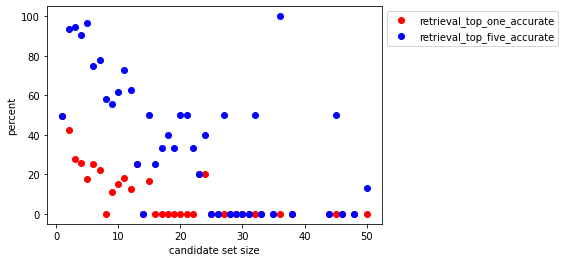

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_ylabel('percent')
ax.set_xlabel('candidate set size')
ax.plot(x_candidate_set_size, y_r_top_one, 'ro', label='retrieval_top_one_accurate')
ax.plot(x_candidate_set_size, y_r_top_five, 'bo', label='retrieval_top_five_accurate')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


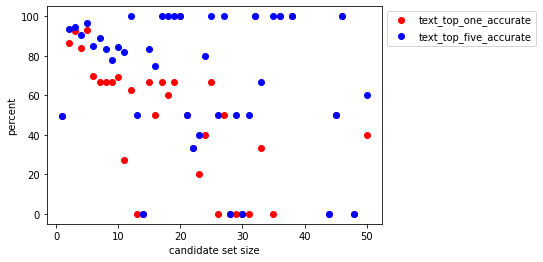

In [66]:
fig, ax = plt.subplots()
ax.set_ylabel('percent')
ax.set_xlabel('candidate set size')
ax.plot(x_candidate_set_size, y_t_top_one, 'ro', label='text_top_one_accurate')
ax.plot(x_candidate_set_size, y_t_top_five, 'bo', label='text_top_five_accurate')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


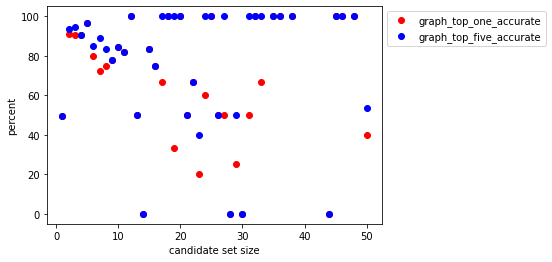

In [65]:
fig, ax = plt.subplots()
ax.set_ylabel('percent')
ax.set_xlabel('candidate set size')
ax.plot(x_candidate_set_size, y_g_top_one, 'ro', label='graph_top_one_accurate')
ax.plot(x_candidate_set_size, y_g_top_five, 'bo', label='graph_top_five_accurate')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


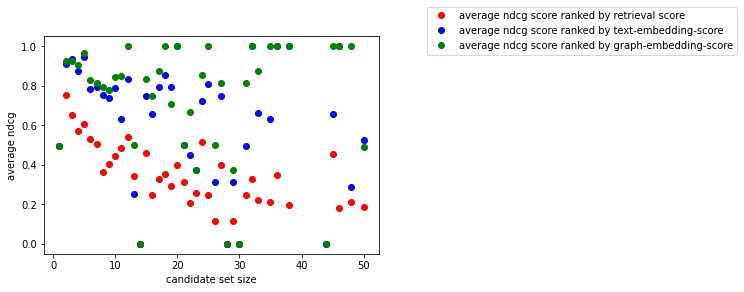

In [64]:
fig, ax = plt.subplots()
ax.set_ylabel('average ndcg')
ax.set_xlabel('candidate set size')
ax.plot(x_candidate_set_size, y_avg_r_ndcg, 'ro', label='average ndcg score ranked by retrieval score')
ax.plot(x_candidate_set_size, y_avg_t_ndcg, 'bo', label='average ndcg score ranked by text-embedding-score')
ax.plot(x_candidate_set_size, y_avg_g_ndcg, 'go', label='average ndcg score ranked by graph-embedding-score')
fig.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

### 02/16 stats on each eval file

In [1]:
import pandas as pd
candidate_eval_data = pd.read_csv('./candidate_eval.csv', index_col=False)
candidate_eval_data

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
0,14067031_0_559833072073397908,0,0,5,0.520535,1.0,1.0,0,1,1,1,1,1,1,1
1,14067031_0_559833072073397908,1,0,12,0.500000,1.0,1.0,0,1,1,1,1,1,1,1
2,14067031_0_559833072073397908,2,0,5,0.430677,1.0,1.0,0,1,1,1,1,1,1,1
3,14067031_0_559833072073397908,3,0,1,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
4,14067031_0_559833072073397908,4,0,3,0.630930,1.0,1.0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,84575189_0_6365692015941409487,95,2,1,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
802,84575189_0_6365692015941409487,96,2,1,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
803,84575189_0_6365692015941409487,97,2,1,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
804,84575189_0_6365692015941409487,98,2,1,0.000000,0.0,0.0,0,0,0,0,0,0,1,0


In [2]:
# candidate_eval_data = candidate_eval_data.drop(['Unnamed: 0'], axis=1)
# candidate_eval_data

In [3]:
import os

eval_file_names = []
eval_file_ids = []

for (dirpath, dirnames, filenames) in os.walk('/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/'):
    for fn in filenames:
        if "csv" not in fn:
            continue
        abs_fn = dirpath + fn
        assert os.path.isfile(abs_fn)
        if os.path.getsize(abs_fn) == 0:
            continue
        eval_file_names.append(abs_fn)
        eval_file_ids.append(fn.split('.csv')[0])
len(eval_file_names), len(eval_file_ids)

(9, 9)

In [4]:
eval_file_ids

['39759273_0_1427898308030295194',
 '45073662_0_3179937335063201739',
 '29414811_2_4773219892816395776',
 '84575189_0_6365692015941409487',
 '14380604_4_3329235705746762392',
 '52299421_0_4473286348258170200',
 '50270082_0_444360818941411589',
 '28086084_0_3127660530989916727',
 '14067031_0_559833072073397908']

In [5]:
f_candidate_eval_data = candidate_eval_data[candidate_eval_data['table_id'] == '52299421_0_4473286348258170200']
f_candidate_eval_data

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
614,52299421_0_4473286348258170200,0,1,4,0.430677,0.500000,1.0,0,1,0,1,1,1,1,1
615,52299421_0_4473286348258170200,1,1,24,1.000000,0.356207,1.0,1,1,0,0,1,1,1,1
616,52299421_0_4473286348258170200,2,1,11,0.371530,0.630930,1.0,0,1,0,1,1,1,1,1
617,52299421_0_4473286348258170200,3,1,45,0.710310,0.315465,1.0,0,1,0,0,1,1,1,1
618,52299421_0_4473286348258170200,4,1,1,0.000000,0.000000,0.0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,52299421_0_4473286348258170200,87,1,32,0.263558,1.000000,1.0,0,0,1,1,1,1,1,1
702,52299421_0_4473286348258170200,88,1,25,0.231703,0.430677,1.0,0,0,0,1,1,1,1,1
703,52299421_0_4473286348258170200,89,1,5,0.500000,1.000000,1.0,0,1,1,1,1,1,1,1
704,52299421_0_4473286348258170200,90,1,18,0.391246,1.000000,1.0,0,0,1,1,1,1,1,1


In [6]:
def compute_eval_file_stats(f_candidate_eval_data):
    res = {}
    num_tasks = len(f_candidate_eval_data)
    df_has_gt = f_candidate_eval_data[f_candidate_eval_data['has_gt'] == 1]
    df_has_gt_in_candidate = f_candidate_eval_data[f_candidate_eval_data['has_gt_in_candidate'] == 1]
    df_singleton_candidate = f_candidate_eval_data[f_candidate_eval_data['count'] == 1]
    df_singleton_candidate_has_gt = f_candidate_eval_data[(f_candidate_eval_data['count'] == 1) & (f_candidate_eval_data['has_gt_in_candidate'] == 1)]
    df_retrieval_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['retrieval_top_one_accurate'] == 1]
    df_retrieval_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['retrieval_top_five_accurate'] == 1]
    df_text_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['text_top_one_accurate'] == 1]
    df_text_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['text_top_five_accurate'] == 1]
    df_graph_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['graph_top_one_accurate'] == 1]
    df_graph_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['graph_top_five_accurate'] == 1]
    
    res['table_id'] = f_candidate_eval_data['table_id'].iloc[0]
    res['num_tasks'] = num_tasks
    res['num_tasks_with_gt'] = len(df_has_gt)
    res['num_tasks_with_gt_in_candidate'] = len(df_has_gt_in_candidate) / len(df_has_gt) * 100
    res['num_tasks_with_singleton_candidate'] = len(df_singleton_candidate) / len(df_has_gt) * 100
    res['num_tasks_with_singleton_candidate_with_gt'] = len(df_singleton_candidate_has_gt) / len(df_has_gt) * 100
    res['num_tasks_with_retrieval_top_one_accurate'] = len(df_retrieval_top_one_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_retrieval_top_five_accurate'] = len(df_retrieval_top_five_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_text_top_one_accurate'] = len(df_text_top_one_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_text_top_five_accurate'] = len(df_text_top_five_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_graph_top_one_accurate'] = len(df_graph_top_one_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_graph_top_five_accurate'] = len(df_graph_top_five_accurate) / len(df_has_gt) * 100
    
    res['average_ndcg_retrieval'] = df_has_gt['r_ndcg'].mean()
    res['average_ndcg_text'] = df_has_gt['t_ndcg'].mean()
    res['average_ndcg_graph'] = df_has_gt['g_ndcg'].mean()
    
    return res

In [100]:
def compute_eval_file_stats_count(f_candidate_eval_data):
    res = {}
    num_tasks = len(f_candidate_eval_data)
    df_has_gt = f_candidate_eval_data[f_candidate_eval_data['has_gt'] == 1]
    df_has_gt_in_candidate = f_candidate_eval_data[f_candidate_eval_data['has_gt_in_candidate'] == 1]
    df_singleton_candidate = f_candidate_eval_data[f_candidate_eval_data['count'] == 1]
    df_singleton_candidate_has_gt = f_candidate_eval_data[(f_candidate_eval_data['count'] == 1) & (f_candidate_eval_data['has_gt_in_candidate'] == 1)]
    df_retrieval_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['retrieval_top_one_accurate'] == 1]
    df_retrieval_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['retrieval_top_five_accurate'] == 1]
    df_text_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['text_top_one_accurate'] == 1]
    df_text_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['text_top_five_accurate'] == 1]
    df_graph_top_one_accurate = f_candidate_eval_data[f_candidate_eval_data['graph_top_one_accurate'] == 1]
    df_graph_top_five_accurate = f_candidate_eval_data[f_candidate_eval_data['graph_top_five_accurate'] == 1]
    
    res['table_id'] = f_candidate_eval_data['table_id'].iloc[0]
    res['num_tasks'] = num_tasks
    res['num_tasks_with_gt'] = len(df_has_gt)
    res['num_tasks_with_gt_in_candidate'] = len(df_has_gt_in_candidate)
    res['num_tasks_with_singleton_candidate'] = len(df_singleton_candidate)
    res['num_tasks_with_singleton_candidate_with_gt'] = len(df_singleton_candidate_has_gt)
    res['num_tasks_with_retrieval_top_one_accurate'] = len(df_retrieval_top_one_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_retrieval_top_five_accurate'] = len(df_retrieval_top_five_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_text_top_one_accurate'] = len(df_text_top_one_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_text_top_five_accurate'] = len(df_text_top_five_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_graph_top_one_accurate'] = len(df_graph_top_one_accurate) / len(df_has_gt) * 100
    res['num_tasks_with_graph_top_five_accurate'] = len(df_graph_top_five_accurate) / len(df_has_gt) * 100
    
    res['average_ndcg_retrieval'] = df_has_gt['r_ndcg'].mean()
    res['average_ndcg_text'] = df_has_gt['t_ndcg'].mean()
    res['average_ndcg_graph'] = df_has_gt['g_ndcg'].mean()
    
    return res

In [7]:
res = compute_eval_file_stats(f_candidate_eval_data)
print(f"table id is {res['table_id']}")
print(f"number of tasks: {res['num_tasks']}")
print(f"number of tasks with ground truth: {res['num_tasks_with_gt']}")
print(f"number of tasks with ground truth in candidate set: {res['num_tasks_with_gt_in_candidate']}")
print(f"number of tasks has singleton candidate set: {res['num_tasks_with_singleton_candidate']}")
print(f"number of tasks has singleton candidate set which is ground truth: {res['num_tasks_with_singleton_candidate_with_gt']}")
print()
print(f"number of tasks with top-1 accuracy in terms of retrieval score: {res['num_tasks_with_retrieval_top_one_accurate']}")
print(f"number of tasks with top-5 accuracy in terms of retrieval score: {res['num_tasks_with_retrieval_top_five_accurate']}")
print(f"number of tasks with top-1 accuracy in terms of text embedding score: {res['num_tasks_with_text_top_one_accurate']}")
print(f"number of tasks with top-5 accuracy in terms of text embedding score: {res['num_tasks_with_text_top_five_accurate']}")
print(f"number of tasks with top-1 accuracy in terms of graph embedding score: {res['num_tasks_with_graph_top_one_accurate']}")
print(f"number of tasks with top-5 accuracy in terms of graph embedding score: {res['num_tasks_with_graph_top_five_accurate']}")
print()
print(f"average ndcg score ranked by retrieval score: {res['average_ndcg_retrieval']}")
print(f"average ndcg score ranked by text-embedding-score: {res['average_ndcg_text']}")
print(f"average ndcg score ranked by graph-embedding-score: {res['average_ndcg_graph']}")

table id is 52299421_0_4473286348258170200
number of tasks: 92
number of tasks with ground truth: 91
number of tasks with ground truth in candidate set: 91.20879120879121
number of tasks has singleton candidate set: 9.89010989010989
number of tasks has singleton candidate set which is ground truth: 1.098901098901099

number of tasks with top-1 accuracy in terms of retrieval score: 15.384615384615385
number of tasks with top-5 accuracy in terms of retrieval score: 60.43956043956044
number of tasks with top-1 accuracy in terms of text embedding score: 69.23076923076923
number of tasks with top-5 accuracy in terms of text embedding score: 84.61538461538461
number of tasks with top-1 accuracy in terms of graph embedding score: 89.01098901098901
number of tasks with top-5 accuracy in terms of graph embedding score: 91.20879120879121

average ndcg score ranked by retrieval score: 0.4778326176841276
average ndcg score ranked by text-embedding-score: 0.796349211696553
average ndcg score ranked

In [200]:
all_tables = {}
for tid in eval_file_ids:
    f_candidate_eval_data = candidate_eval_data[candidate_eval_data['table_id'] == tid]
    all_tables[tid] = compute_eval_file_stats(f_candidate_eval_data)
all_tables

{'39759273_0_1427898308030295194': {'table_id': '39759273_0_1427898308030295194',
  'num_tasks': 87,
  'num_tasks_with_gt': 87,
  'num_tasks_with_gt_in_candidate': 98.85057471264368,
  'num_tasks_with_singleton_candidate': 10.344827586206897,
  'num_tasks_with_singleton_candidate_with_gt': 10.344827586206897,
  'num_tasks_with_retrieval_top_one_accurate': 39.08045977011494,
  'num_tasks_with_retrieval_top_five_accurate': 87.35632183908046,
  'num_tasks_with_text_top_one_accurate': 79.3103448275862,
  'num_tasks_with_text_top_five_accurate': 97.70114942528735,
  'num_tasks_with_graph_top_one_accurate': 93.10344827586206,
  'num_tasks_with_graph_top_five_accurate': 97.70114942528735,
  'average_ndcg_retrieval': 0.6678958224843372,
  'average_ndcg_text': 0.9066186591821254,
  'average_ndcg_graph': 0.964137082774642},
 '45073662_0_3179937335063201739': {'table_id': '45073662_0_3179937335063201739',
  'num_tasks': 25,
  'num_tasks_with_gt': 25,
  'num_tasks_with_gt_in_candidate': 100.0,
  '

In [101]:
all_tables = {}
for tid in eval_file_ids:
    f_candidate_eval_data = candidate_eval_data[candidate_eval_data['table_id'] == tid]
    all_tables[tid] = compute_eval_file_stats_count(f_candidate_eval_data)
all_tables

{'39759273_0_1427898308030295194': {'table_id': '39759273_0_1427898308030295194',
  'num_tasks': 100,
  'num_tasks_with_gt': 100,
  'num_tasks_with_gt_in_candidate': 86,
  'num_tasks_with_singleton_candidate': 22,
  'num_tasks_with_singleton_candidate_with_gt': 9,
  'num_tasks_with_retrieval_top_one_accurate': 34.0,
  'num_tasks_with_retrieval_top_five_accurate': 76.0,
  'num_tasks_with_text_top_one_accurate': 69.0,
  'num_tasks_with_text_top_five_accurate': 85.0,
  'num_tasks_with_graph_top_one_accurate': 81.0,
  'num_tasks_with_graph_top_five_accurate': 85.0,
  'average_ndcg_retrieval': 0.5810693655613735,
  'average_ndcg_text': 0.7887582334884491,
  'average_ndcg_graph': 0.8387992620139386},
 '45073662_0_3179937335063201739': {'table_id': '45073662_0_3179937335063201739',
  'num_tasks': 27,
  'num_tasks_with_gt': 27,
  'num_tasks_with_gt_in_candidate': 25,
  'num_tasks_with_singleton_candidate': 12,
  'num_tasks_with_singleton_candidate_with_gt': 10,
  'num_tasks_with_retrieval_top_

In [91]:
eval_file_ids

['39759273_0_1427898308030295194',
 '45073662_0_3179937335063201739',
 '29414811_2_4773219892816395776',
 '84575189_0_6365692015941409487',
 '14380604_4_3329235705746762392',
 '52299421_0_4473286348258170200',
 '50270082_0_444360818941411589',
 '28086084_0_3127660530989916727',
 '14067031_0_559833072073397908']

In [103]:
# visualize ten dev eval file stats
# Recompute all tables if needed
x_eval_fid = [
    'movies',
    'players I',
    'video games',
    'magazines',
    'companies',
    'country I',
    'players II',
    'pope',
    'country II'
]
x_eval_fidx = range(len(x_eval_fid))
y_num_tasks_with_gt_in_candidate = []
y_num_tasks_with_singleton_candidate = []
y_num_tasks_with_singleton_candidate_with_gt = []
y_num_tasks_with_retrieval_top_one_accurate = []
y_num_tasks_with_retrieval_top_five_accurate = []
y_num_tasks_with_text_top_one_accurate = []
y_num_tasks_with_text_top_five_accurate = []
y_num_tasks_with_graph_top_one_accurate = []
y_num_tasks_with_graph_top_five_accurate = []
y_average_ndcg_retrieval = []
y_average_ndcg_text = []
y_average_ndcg_graph = []

for idx in range(len(x_eval_fid)):
    table_id = eval_file_ids[idx]
    y_num_tasks_with_gt_in_candidate.append(all_tables[table_id]['num_tasks_with_gt_in_candidate'])
    y_num_tasks_with_singleton_candidate.append(all_tables[table_id]['num_tasks_with_singleton_candidate'])
    y_num_tasks_with_singleton_candidate_with_gt.append(all_tables[table_id]['num_tasks_with_singleton_candidate_with_gt'])
    y_num_tasks_with_retrieval_top_one_accurate.append(all_tables[table_id]['num_tasks_with_retrieval_top_one_accurate'])
    y_num_tasks_with_retrieval_top_five_accurate.append(all_tables[table_id]['num_tasks_with_retrieval_top_five_accurate'])
    y_num_tasks_with_text_top_one_accurate.append(all_tables[table_id]['num_tasks_with_text_top_one_accurate'])
    y_num_tasks_with_text_top_five_accurate.append(all_tables[table_id]['num_tasks_with_text_top_five_accurate'])
    y_num_tasks_with_graph_top_one_accurate.append(all_tables[table_id]['num_tasks_with_graph_top_one_accurate'])
    y_num_tasks_with_graph_top_five_accurate.append(all_tables[table_id]['num_tasks_with_graph_top_five_accurate'])
    y_average_ndcg_retrieval.append(all_tables[table_id]['average_ndcg_retrieval'])
    y_average_ndcg_text.append(all_tables[table_id]['average_ndcg_text'])
    y_average_ndcg_graph.append(all_tables[table_id]['average_ndcg_graph'])
    
y_num_tasks_with_text_top_five_accurate

[85.0,
 92.5925925925926,
 72.72727272727273,
 0.0,
 100.0,
 84.61538461538461,
 61.30952380952381,
 66.36363636363637,
 84.90566037735849]

In [55]:
import statistics
def compute_list_stats(l):
    return min(l), max(l), statistics.median(l), statistics.mean(l), statistics.stdev(l)

In [41]:
print('% tasks_with_gt_in_candidate : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_gt_in_candidate)))
print('% tasks_with_singleton_candidate : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_singleton_candidate)))
print('% tasks_with_singleton_candidate_with_gt : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_singleton_candidate_with_gt)))
print('% tasks_with_retrieval_top_one_accurate : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_retrieval_top_one_accurate)))
print('% tasks_with_retrieval_top_five_accurate : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_retrieval_top_five_accurate)))
print('% tasks_with_text_top_one_accurate : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_text_top_one_accurate)))
print('% tasks_with_text_top_five_accurate : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_text_top_five_accurate)))
print('% tasks_with_graph_top_one_accurate : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_graph_top_one_accurate)))
print('% tasks_with_graph_top_five_accurate : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_average_ndcg_retrieval)))
print('average_ndcg_retrieval : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_num_tasks_with_graph_top_five_accurate)))
print('average_ndcg_text : \n min is {},\n max is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_average_ndcg_text)))
print('average_ndcg_graph : \n min is {}, \nmax is {},\n median is {},\n mean is {},\n std is {}'.format(*compute_list_stats(y_average_ndcg_graph)))

% tasks_with_gt_in_candidate : 
 min is 0.0,
 max is 100.0,
 median is 84.90566037735849,
 mean is 72.84022472596897,
 std is 30.122460987028397
% tasks_with_singleton_candidate : 
 min is 9.89010989010989,
 max is 88.77551020408163,
 median is 44.44444444444444,
 mean is 50.245196984639925,
 std is 29.50233630776287
% tasks_with_singleton_candidate_with_gt : 
 min is 0.0,
 max is 50.90909090909091,
 median is 37.03703703703704,
 mean is 25.88109568822357,
 std is 20.926451392789865
% tasks_with_retrieval_top_one_accurate : 
 min is 0.0,
 max is 59.25925925925925,
 median is 48.80952380952381,
 mean is 36.92211383615996,
 std is 20.536912271188104
% tasks_with_retrieval_top_five_accurate : 
 min is 0.0,
 max is 88.88888888888889,
 median is 72.72727272727273,
 mean is 64.39506207745201,
 std is 26.325153159169574
% tasks_with_text_top_one_accurate : 
 min is 0.0,
 max is 95.0,
 median is 69.0,
 mean is 65.6266707901928,
 std is 27.782162920801042
% tasks_with_text_top_five_accurate : 


/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


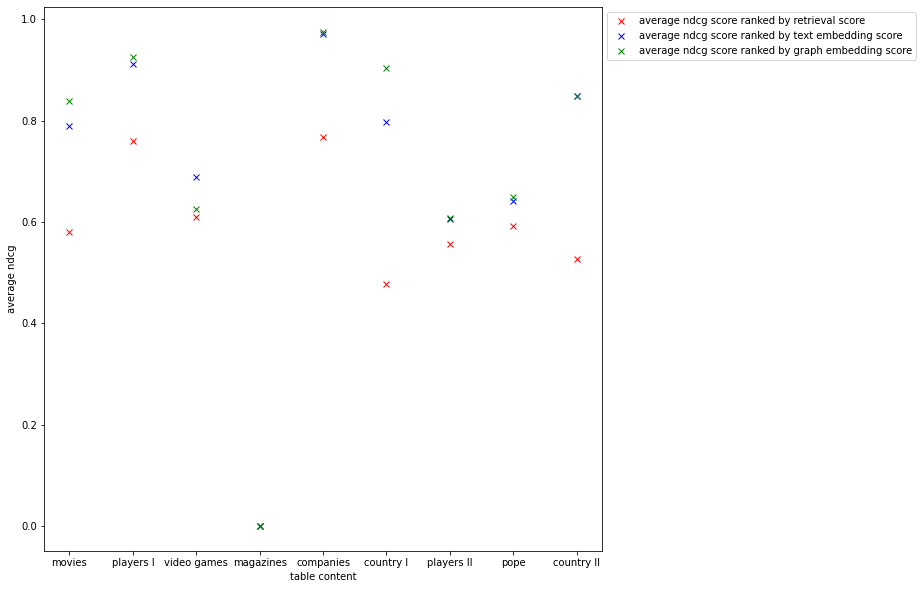

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel('average ndcg')
ax.set_xlabel('table content')
ax.plot(x_eval_fid, y_average_ndcg_retrieval, 'rx', label='average ndcg score ranked by retrieval score')
ax.plot(x_eval_fid, y_average_ndcg_text, 'bx', label='average ndcg score ranked by text embedding score')
ax.plot(x_eval_fid, y_average_ndcg_graph, 'gx', label='average ndcg score ranked by graph embedding score')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


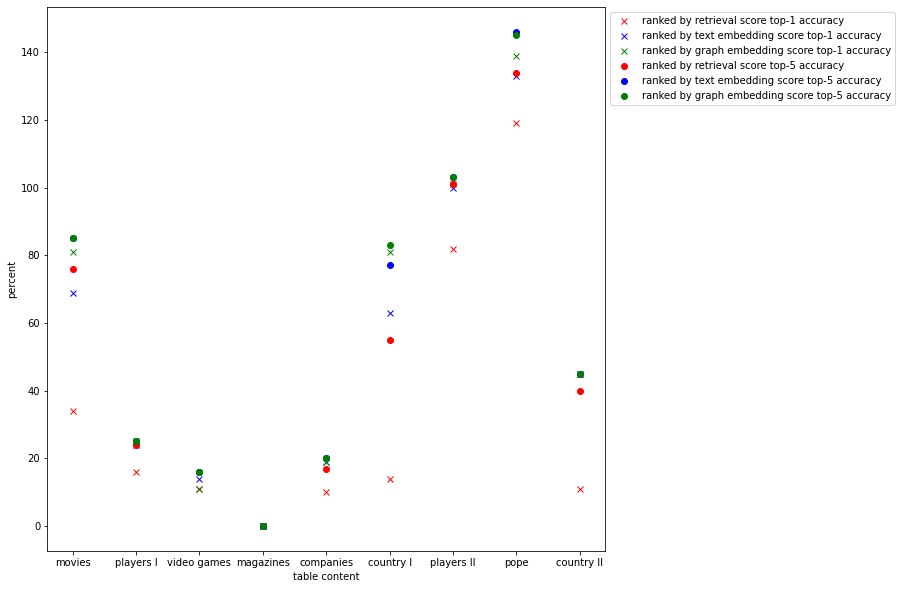

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel('percent')
ax.set_xlabel('table content')
ax.plot(x_eval_fid, y_num_tasks_with_retrieval_top_one_accurate, 'rx', label='ranked by retrieval score top-1 accuracy')
ax.plot(x_eval_fid, y_num_tasks_with_text_top_one_accurate, 'bx', label='ranked by text embedding score top-1 accuracy')
ax.plot(x_eval_fid, y_num_tasks_with_graph_top_one_accurate, 'gx', label='ranked by graph embedding score top-1 accuracy')
ax.plot(x_eval_fid, y_num_tasks_with_retrieval_top_five_accurate, 'ro', label='ranked by retrieval score top-5 accuracy')
ax.plot(x_eval_fid, y_num_tasks_with_text_top_five_accurate, 'bo', label='ranked by text embedding score top-5 accuracy')
ax.plot(x_eval_fid, y_num_tasks_with_graph_top_five_accurate, 'go', label='ranked by graph embedding score top-5 accuracy')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

In [44]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_ylabel('percent')
# ax.set_xlabel('table_id idx')
# ax.plot(x_eval_fid, y_num_tasks_with_retrieval_top_five_accurate, 'rx', label='ranked by retrieval score top-5 accuracy')
# ax.plot(x_eval_fid, y_num_tasks_with_text_top_five_accurate, 'bx', label='ranked by text embedding score top-5 accuracy')
# ax.plot(x_eval_fid, y_num_tasks_with_graph_top_five_accurate, 'gx', label='ranked by graph embedding score top-5 accuracy')
# ax.legend(bbox_to_anchor=(1,1), loc="upper left")
# fig.show()

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


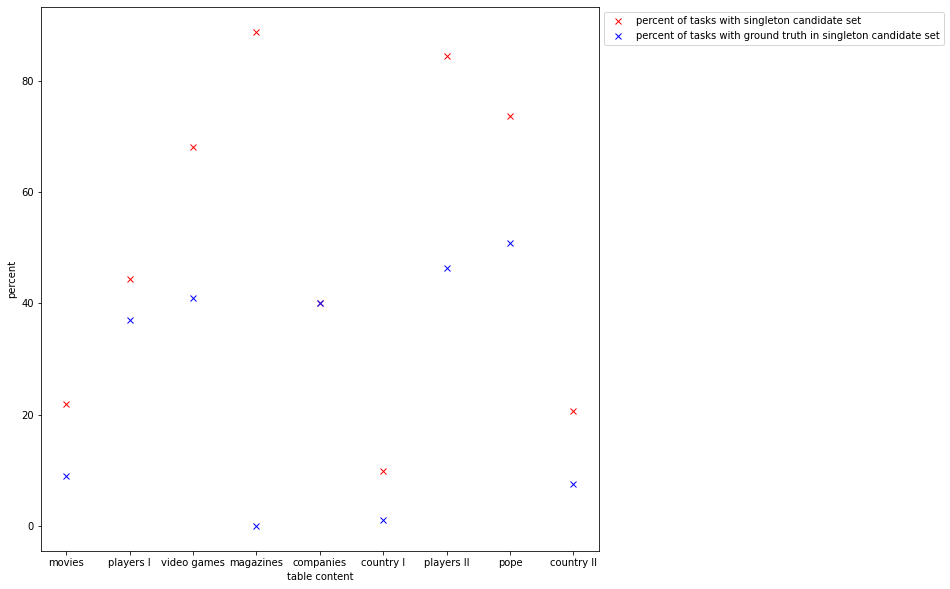

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel('percent')
ax.set_xlabel('table content')
ax.plot(x_eval_fid, y_num_tasks_with_singleton_candidate, 'rx', label='percent of tasks with singleton candidate set')
ax.plot(x_eval_fid, y_num_tasks_with_singleton_candidate_with_gt, 'bx', label='percent of tasks with ground truth in singleton candidate set')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

### 02/17 More plots

In [45]:
candidate_eval_data[candidate_eval_data['count'] == 1]

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
3,14067031_0_559833072073397908,3,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
11,14067031_0_559833072073397908,11,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
12,14067031_0_559833072073397908,12,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
13,14067031_0_559833072073397908,13,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
14,14067031_0_559833072073397908,14,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,84575189_0_6365692015941409487,95,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
802,84575189_0_6365692015941409487,96,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
803,84575189_0_6365692015941409487,97,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
804,84575189_0_6365692015941409487,98,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0


In [95]:
[all_tables[tid]['num_tasks_with_singleton_candidate'] for tid in all_tables]

[22, 12, 15, 87, 8, 9, 142, 162, 11]

In [96]:
# x_axis percetage of singleton

x_pos = [all_tables[tid]['num_tasks_with_singleton_candidate'] for tid in all_tables]
x_posgt = [all_tables[tid]['num_tasks_with_singleton_candidate_with_gt'] for tid in all_tables]

len(x_pos), len(x_posgt)

(9, 9)

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


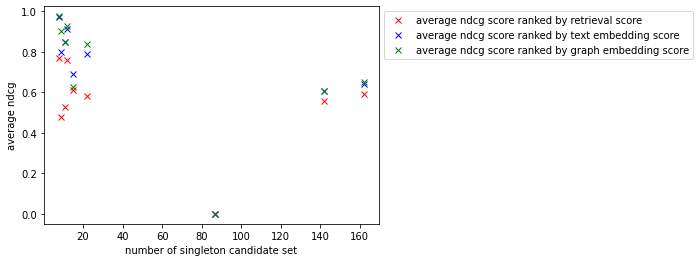

In [98]:
fig, ax = plt.subplots()
ax.set_ylabel('average ndcg')
# ax.set_xlabel('percentage of singleton candidate set')
ax.set_xlabel('number of singleton candidate set')
ax.plot(x_pos, y_average_ndcg_retrieval, 'rx', label='average ndcg score ranked by retrieval score')
ax.plot(x_pos, y_average_ndcg_text, 'bx', label='average ndcg score ranked by text embedding score')
ax.plot(x_pos, y_average_ndcg_graph, 'gx', label='average ndcg score ranked by graph embedding score')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


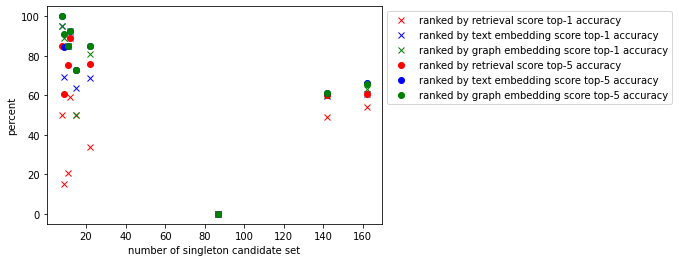

In [104]:
fig, ax = plt.subplots()
ax.set_ylabel('percent')
# ax.set_xlabel('percentage of singleton candidate set')
ax.set_xlabel('number of singleton candidate set')

ax.plot(x_pos, y_num_tasks_with_retrieval_top_one_accurate, 'rx', label='ranked by retrieval score top-1 accuracy')
ax.plot(x_pos, y_num_tasks_with_text_top_one_accurate, 'bx', label='ranked by text embedding score top-1 accuracy')
ax.plot(x_pos, y_num_tasks_with_graph_top_one_accurate, 'gx', label='ranked by graph embedding score top-1 accuracy')
ax.plot(x_pos, y_num_tasks_with_retrieval_top_five_accurate, 'ro', label='ranked by retrieval score top-5 accuracy')
ax.plot(x_pos, y_num_tasks_with_text_top_five_accurate, 'bo', label='ranked by text embedding score top-5 accuracy')
ax.plot(x_pos, y_num_tasks_with_graph_top_five_accurate, 'go', label='ranked by graph embedding score top-5 accuracy')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


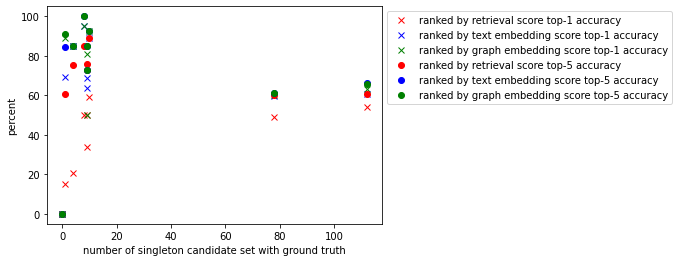

In [105]:
fig, ax = plt.subplots()
ax.set_ylabel('percent')
# ax.set_xlabel('percentage of singleton candidate set with ground truth')
ax.set_xlabel('number of singleton candidate set with ground truth')
ax.plot(x_posgt, y_num_tasks_with_retrieval_top_one_accurate, 'rx', label='ranked by retrieval score top-1 accuracy')
ax.plot(x_posgt, y_num_tasks_with_text_top_one_accurate, 'bx', label='ranked by text embedding score top-1 accuracy')
ax.plot(x_posgt, y_num_tasks_with_graph_top_one_accurate, 'gx', label='ranked by graph embedding score top-1 accuracy')
ax.plot(x_posgt, y_num_tasks_with_retrieval_top_five_accurate, 'ro', label='ranked by retrieval score top-5 accuracy')
ax.plot(x_posgt, y_num_tasks_with_text_top_five_accurate, 'bo', label='ranked by text embedding score top-5 accuracy')
ax.plot(x_posgt, y_num_tasks_with_graph_top_five_accurate, 'go', label='ranked by graph embedding score top-5 accuracy')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

/Users/summ7t/dev/novartis/novartis_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


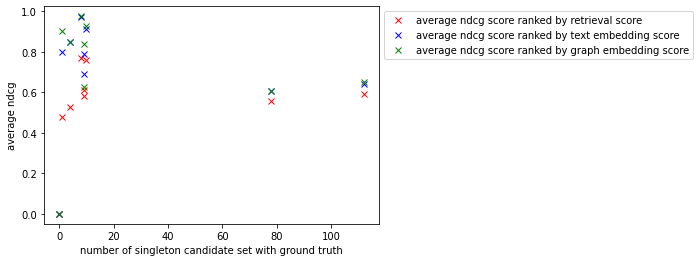

In [106]:
fig, ax = plt.subplots()
ax.set_ylabel('average ndcg')
ax.set_xlabel('number of singleton candidate set with ground truth')
# ax.set_xlabel('percentage of singleton candidate set with ground truth')
ax.plot(x_posgt, y_average_ndcg_retrieval, 'rx', label='average ndcg score ranked by retrieval score')
ax.plot(x_posgt, y_average_ndcg_text, 'bx', label='average ndcg score ranked by text embedding score')
ax.plot(x_posgt, y_average_ndcg_graph, 'gx', label='average ndcg score ranked by graph embedding score')
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
fig.show()

### 02/19 More experiments: wrong singleton

In [180]:
import pandas as pd
candidate_eval_data = pd.read_csv('./candidate_eval_no_empty.csv', index_col=False)
candidate_eval_data

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
0,14067031_0_559833072073397908,0,0,5,0.520535,1.0,1.0,0,1,1,1,1,1,1,1
1,14067031_0_559833072073397908,1,0,12,0.500000,1.0,1.0,0,1,1,1,1,1,1,1
2,14067031_0_559833072073397908,2,0,5,0.430677,1.0,1.0,0,1,1,1,1,1,1,1
3,14067031_0_559833072073397908,4,0,3,0.630930,1.0,1.0,0,1,1,1,1,1,1,1
4,14067031_0_559833072073397908,5,0,4,1.000000,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,84575189_0_6365692015941409487,83,2,50,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
579,84575189_0_6365692015941409487,86,2,6,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
580,84575189_0_6365692015941409487,88,2,2,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
581,84575189_0_6365692015941409487,97,2,1,0.000000,0.0,0.0,0,0,0,0,0,0,1,0


In [181]:
# Sub all singleton candidate set to see how "good" the algorithm can be
subbed_candidate_eval_data = candidate_eval_data.copy()
for i, row in subbed_candidate_eval_data.iterrows():
    if row['count'] == 1:
        subbed_candidate_eval_data.loc[i, 'retrieval_top_one_accurate'] = 1
        subbed_candidate_eval_data.loc[i, 'retrieval_top_five_accurate'] = 1
        subbed_candidate_eval_data.loc[i, 'text_top_one_accurate'] = 1
        subbed_candidate_eval_data.loc[i, 'text_top_five_accurate'] = 1
        subbed_candidate_eval_data.loc[i, 'graph_top_one_accurate'] = 1
        subbed_candidate_eval_data.loc[i, 'graph_top_five_accurate'] = 1
        subbed_candidate_eval_data.loc[i, 'has_gt'] = 1
        subbed_candidate_eval_data.loc[i, 'has_gt_in_candidate'] = 1
        subbed_candidate_eval_data.loc[i, 'r_ndcg'] = 1
        subbed_candidate_eval_data.loc[i, 't_ndcg'] = 1
        subbed_candidate_eval_data.loc[i, 'g_ndcg'] = 1
subbed_candidate_eval_data

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
0,14067031_0_559833072073397908,0,0,5,0.520535,1.0,1.0,0,1,1,1,1,1,1,1
1,14067031_0_559833072073397908,1,0,12,0.500000,1.0,1.0,0,1,1,1,1,1,1,1
2,14067031_0_559833072073397908,2,0,5,0.430677,1.0,1.0,0,1,1,1,1,1,1,1
3,14067031_0_559833072073397908,4,0,3,0.630930,1.0,1.0,0,1,1,1,1,1,1,1
4,14067031_0_559833072073397908,5,0,4,1.000000,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,84575189_0_6365692015941409487,83,2,50,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
579,84575189_0_6365692015941409487,86,2,6,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
580,84575189_0_6365692015941409487,88,2,2,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
581,84575189_0_6365692015941409487,97,2,1,1.000000,1.0,1.0,1,1,1,1,1,1,1,1


In [182]:
dropped_candidate_eval_data = candidate_eval_data.copy()[(candidate_eval_data['count'] != 1) | (candidate_eval_data['has_gt_in_candidate'] == 1)]
dropped_candidate_eval_data

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
0,14067031_0_559833072073397908,0,0,5,0.520535,1.0,1.0,0,1,1,1,1,1,1,1
1,14067031_0_559833072073397908,1,0,12,0.500000,1.0,1.0,0,1,1,1,1,1,1,1
2,14067031_0_559833072073397908,2,0,5,0.430677,1.0,1.0,0,1,1,1,1,1,1,1
3,14067031_0_559833072073397908,4,0,3,0.630930,1.0,1.0,0,1,1,1,1,1,1,1
4,14067031_0_559833072073397908,5,0,4,1.000000,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,84575189_0_6365692015941409487,77,2,10,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
577,84575189_0_6365692015941409487,82,2,4,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
578,84575189_0_6365692015941409487,83,2,50,0.000000,0.0,0.0,0,0,0,0,0,0,1,0
579,84575189_0_6365692015941409487,86,2,6,0.000000,0.0,0.0,0,0,0,0,0,0,1,0


In [183]:
candidate_eval_data[candidate_eval_data['count'] == 1]

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
11,14067031_0_559833072073397908,16,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
17,14067031_0_559833072073397908,23,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
33,14067031_0_559833072073397908,39,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
45,14067031_0_559833072073397908,51,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
46,14380604_4_3329235705746762392,0,1,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,84575189_0_6365692015941409487,44,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
571,84575189_0_6365692015941409487,53,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
575,84575189_0_6365692015941409487,70,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
581,84575189_0_6365692015941409487,97,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0


In [184]:
subbed_candidate_eval_data[subbed_candidate_eval_data['count'] == 1]

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
11,14067031_0_559833072073397908,16,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
17,14067031_0_559833072073397908,23,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
33,14067031_0_559833072073397908,39,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
45,14067031_0_559833072073397908,51,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
46,14380604_4_3329235705746762392,0,1,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,84575189_0_6365692015941409487,44,2,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
571,84575189_0_6365692015941409487,53,2,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
575,84575189_0_6365692015941409487,70,2,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
581,84575189_0_6365692015941409487,97,2,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1


In [185]:
dropped_candidate_eval_data[dropped_candidate_eval_data['count'] == 1]

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
11,14067031_0_559833072073397908,16,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
17,14067031_0_559833072073397908,23,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
33,14067031_0_559833072073397908,39,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
45,14067031_0_559833072073397908,51,0,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
46,14380604_4_3329235705746762392,0,1,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,50270082_0_444360818941411589,161,1,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
475,50270082_0_444360818941411589,162,1,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
477,50270082_0_444360818941411589,165,1,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1
479,50270082_0_444360818941411589,167,1,1,1.0,1.0,1.0,1,1,1,1,1,1,1,1


In [186]:
# compute the same metrics
import os

eval_file_names = []
eval_file_ids = []

for (dirpath, dirnames, filenames) in os.walk('/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/'):
    for fn in filenames:
        if "csv" not in fn:
            continue
        abs_fn = dirpath + fn
        assert os.path.isfile(abs_fn)
        if os.path.getsize(abs_fn) == 0:
            continue
        eval_file_names.append(abs_fn)
        eval_file_ids.append(fn.split('.csv')[0])
len(eval_file_names), len(eval_file_ids)

(9, 9)

In [187]:
subbed_all_tables = {}
for tid in eval_file_ids:
    f_candidate_eval_data = subbed_candidate_eval_data[subbed_candidate_eval_data['table_id'] == tid]
    subbed_all_tables[tid] = compute_eval_file_stats(f_candidate_eval_data)
subbed_all_tables

{'39759273_0_1427898308030295194': {'table_id': '39759273_0_1427898308030295194',
  'num_tasks': 87,
  'num_tasks_with_gt': 87,
  'num_tasks_with_gt_in_candidate': 98.85057471264368,
  'num_tasks_with_singleton_candidate': 10.344827586206897,
  'num_tasks_with_singleton_candidate_with_gt': 10.344827586206897,
  'num_tasks_with_retrieval_top_one_accurate': 39.08045977011494,
  'num_tasks_with_retrieval_top_five_accurate': 87.35632183908046,
  'num_tasks_with_text_top_one_accurate': 79.3103448275862,
  'num_tasks_with_text_top_five_accurate': 97.70114942528735,
  'num_tasks_with_graph_top_one_accurate': 93.10344827586206,
  'num_tasks_with_graph_top_five_accurate': 97.70114942528735,
  'average_ndcg_retrieval': 0.6678958224843372,
  'average_ndcg_text': 0.9066186591821254,
  'average_ndcg_graph': 0.964137082774642},
 '45073662_0_3179937335063201739': {'table_id': '45073662_0_3179937335063201739',
  'num_tasks': 25,
  'num_tasks_with_gt': 25,
  'num_tasks_with_gt_in_candidate': 100.0,
  '

In [188]:
dropped_all_tables = {}
for tid in eval_file_ids:
    f_candidate_eval_data = dropped_candidate_eval_data[dropped_candidate_eval_data['table_id'] == tid]
    dropped_all_tables[tid] = compute_eval_file_stats(f_candidate_eval_data)
dropped_all_tables

{'39759273_0_1427898308030295194': {'table_id': '39759273_0_1427898308030295194',
  'num_tasks': 87,
  'num_tasks_with_gt': 87,
  'num_tasks_with_gt_in_candidate': 98.85057471264368,
  'num_tasks_with_singleton_candidate': 10.344827586206897,
  'num_tasks_with_singleton_candidate_with_gt': 10.344827586206897,
  'num_tasks_with_retrieval_top_one_accurate': 39.08045977011494,
  'num_tasks_with_retrieval_top_five_accurate': 87.35632183908046,
  'num_tasks_with_text_top_one_accurate': 79.3103448275862,
  'num_tasks_with_text_top_five_accurate': 97.70114942528735,
  'num_tasks_with_graph_top_one_accurate': 93.10344827586206,
  'num_tasks_with_graph_top_five_accurate': 97.70114942528735,
  'average_ndcg_retrieval': 0.6678958224843372,
  'average_ndcg_text': 0.9066186591821254,
  'average_ndcg_graph': 0.964137082774642},
 '45073662_0_3179937335063201739': {'table_id': '45073662_0_3179937335063201739',
  'num_tasks': 25,
  'num_tasks_with_gt': 25,
  'num_tasks_with_gt_in_candidate': 100.0,
  '

In [189]:
# visualize ten dev eval file stats
# Same process as before

x_eval_fid = [
    'movies',
    'players I',
    'video games',
    'magazines',
    'companies',
    'country I',
    'players II',
    'pope',
    'country II'
]
x_eval_fidx = range(len(x_eval_fid))
r_y_num_tasks_with_gt_in_candidate = []
r_y_num_tasks_with_singleton_candidate = []
r_y_num_tasks_with_singleton_candidate_with_gt = []
r_y_num_tasks_with_retrieval_top_one_accurate = []
r_y_num_tasks_with_retrieval_top_five_accurate = []
r_y_num_tasks_with_text_top_one_accurate = []
r_y_num_tasks_with_text_top_five_accurate = []
r_y_num_tasks_with_graph_top_one_accurate = []
r_y_num_tasks_with_graph_top_five_accurate = []
r_y_average_ndcg_retrieval = []
r_y_average_ndcg_text = []
r_y_average_ndcg_graph = []

for idx in range(len(x_eval_fid)):
    table_id = eval_file_ids[idx]
    r_y_num_tasks_with_gt_in_candidate.append(subbed_all_tables[table_id]['num_tasks_with_gt_in_candidate'])
    r_y_num_tasks_with_singleton_candidate.append(subbed_all_tables[table_id]['num_tasks_with_singleton_candidate'])
    r_y_num_tasks_with_singleton_candidate_with_gt.append(subbed_all_tables[table_id]['num_tasks_with_singleton_candidate_with_gt'])
    r_y_num_tasks_with_retrieval_top_one_accurate.append(subbed_all_tables[table_id]['num_tasks_with_retrieval_top_one_accurate'])
    r_y_num_tasks_with_retrieval_top_five_accurate.append(subbed_all_tables[table_id]['num_tasks_with_retrieval_top_five_accurate'])
    r_y_num_tasks_with_text_top_one_accurate.append(subbed_all_tables[table_id]['num_tasks_with_text_top_one_accurate'])
    r_y_num_tasks_with_text_top_five_accurate.append(subbed_all_tables[table_id]['num_tasks_with_text_top_five_accurate'])
    r_y_num_tasks_with_graph_top_one_accurate.append(subbed_all_tables[table_id]['num_tasks_with_graph_top_one_accurate'])
    r_y_num_tasks_with_graph_top_five_accurate.append(subbed_all_tables[table_id]['num_tasks_with_graph_top_five_accurate'])
    r_y_average_ndcg_retrieval.append(subbed_all_tables[table_id]['average_ndcg_retrieval'])
    r_y_average_ndcg_text.append(subbed_all_tables[table_id]['average_ndcg_text'])
    r_y_average_ndcg_graph.append(subbed_all_tables[table_id]['average_ndcg_graph'])
    
r_y_average_ndcg_retrieval, y_average_ndcg_retrieval

([0.6678958224843372,
  0.8206378385677568,
  0.84887882080573,
  0.3157894736842105,
  0.7672928877020503,
  0.5176520024911382,
  0.8979737446305308,
  0.7665410569837456,
  0.6061254404444972],
 [0.5810693655613735,
  0.759849850525701,
  0.6104972706226095,
  0.0,
  0.7672928877020503,
  0.4778326176841276,
  0.5558885085808049,
  0.5918674963640475,
  0.5260711369895636])

In [190]:
x_eval_fid = [
    'movies',
    'players I',
    'video games',
    'magazines',
    'companies',
    'country I',
    'players II',
    'pope',
    'country II'
]
x_eval_fidx = range(len(x_eval_fid))
d_y_num_tasks_with_gt_in_candidate = []
d_y_num_tasks_with_singleton_candidate = []
d_y_num_tasks_with_singleton_candidate_with_gt = []
d_y_num_tasks_with_retrieval_top_one_accurate = []
d_y_num_tasks_with_retrieval_top_five_accurate = []
d_y_num_tasks_with_text_top_one_accurate = []
d_y_num_tasks_with_text_top_five_accurate = []
d_y_num_tasks_with_graph_top_one_accurate = []
d_y_num_tasks_with_graph_top_five_accurate = []
d_y_average_ndcg_retrieval = []
d_y_average_ndcg_text = []
d_y_average_ndcg_graph = []

for idx in range(len(x_eval_fid)):
    table_id = eval_file_ids[idx]
    d_y_num_tasks_with_gt_in_candidate.append(dropped_all_tables[table_id]['num_tasks_with_gt_in_candidate'])
    d_y_num_tasks_with_singleton_candidate.append(dropped_all_tables[table_id]['num_tasks_with_singleton_candidate'])
    d_y_num_tasks_with_singleton_candidate_with_gt.append(dropped_all_tables[table_id]['num_tasks_with_singleton_candidate_with_gt'])
    d_y_num_tasks_with_retrieval_top_one_accurate.append(dropped_all_tables[table_id]['num_tasks_with_retrieval_top_one_accurate'])
    d_y_num_tasks_with_retrieval_top_five_accurate.append(dropped_all_tables[table_id]['num_tasks_with_retrieval_top_five_accurate'])
    d_y_num_tasks_with_text_top_one_accurate.append(dropped_all_tables[table_id]['num_tasks_with_text_top_one_accurate'])
    d_y_num_tasks_with_text_top_five_accurate.append(dropped_all_tables[table_id]['num_tasks_with_text_top_five_accurate'])
    d_y_num_tasks_with_graph_top_one_accurate.append(dropped_all_tables[table_id]['num_tasks_with_graph_top_one_accurate'])
    d_y_num_tasks_with_graph_top_five_accurate.append(dropped_all_tables[table_id]['num_tasks_with_graph_top_five_accurate'])
    d_y_average_ndcg_retrieval.append(dropped_all_tables[table_id]['average_ndcg_retrieval'])
    d_y_average_ndcg_text.append(dropped_all_tables[table_id]['average_ndcg_text'])
    d_y_average_ndcg_graph.append(dropped_all_tables[table_id]['average_ndcg_graph'])
    
d_y_average_ndcg_retrieval, y_average_ndcg_retrieval

([0.6678958224843372,
  0.8206378385677568,
  0.8394337471060882,
  0.0,
  0.7672928877020503,
  0.5176520024911382,
  0.8979737446305308,
  0.7570398209307586,
  0.6061254404444972],
 [0.5810693655613735,
  0.759849850525701,
  0.6104972706226095,
  0.0,
  0.7672928877020503,
  0.4778326176841276,
  0.5558885085808049,
  0.5918674963640475,
  0.5260711369895636])

In [191]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_ylabel('average ndcg')
# ax.set_xlabel('table content')
# ax.plot(x_eval_fid, r_y_average_ndcg_retrieval, 'ro', label='R: average ndcg score ranked by retrieval score')
# ax.plot(x_eval_fid, r_y_average_ndcg_text, 'bo', label='R: average ndcg score ranked by text embedding score')
# ax.plot(x_eval_fid, r_y_average_ndcg_graph, 'go', label='R: average ndcg score ranked by graph embedding score')
# ax.plot(x_eval_fid, y_average_ndcg_retrieval, 'rx', label='average ndcg score ranked by retrieval score')
# ax.plot(x_eval_fid, y_average_ndcg_text, 'bx', label='average ndcg score ranked by text embedding score')
# ax.plot(x_eval_fid, y_average_ndcg_graph, 'gx', label='average ndcg score ranked by graph embedding score')
# ax.legend(bbox_to_anchor=(1,1), loc="upper left")
# fig.show()

In [192]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_ylabel('R: percent')
# ax.set_xlabel('table content')
# ax.plot(x_eval_fid, r_y_num_tasks_with_retrieval_top_one_accurate, 'rx', label='ranked by retrieval score top-1 accuracy')
# ax.plot(x_eval_fid, r_y_num_tasks_with_text_top_one_accurate, 'bx', label='ranked by text embedding score top-1 accuracy')
# ax.plot(x_eval_fid, r_y_num_tasks_with_graph_top_one_accurate, 'gx', label='ranked by graph embedding score top-1 accuracy')
# ax.plot(x_eval_fid, r_y_num_tasks_with_retrieval_top_five_accurate, 'ro', label='ranked by retrieval score top-5 accuracy')
# ax.plot(x_eval_fid, r_y_num_tasks_with_text_top_five_accurate, 'bo', label='ranked by text embedding score top-5 accuracy')
# ax.plot(x_eval_fid, r_y_num_tasks_with_graph_top_five_accurate, 'go', label='ranked by graph embedding score top-5 accuracy')
# ax.legend(bbox_to_anchor=(1,1), loc="upper left")
# fig.show()

In [193]:
# p_min, p_max, p_median, p_mean, p_std = compute_list_stats(y_num_tasks_with_text_top_five_accurate)
# r_min, r_max, r_median, r_mean, r_std = compute_list_stats(r_y_num_tasks_with_text_top_five_accurate)
# r_min - p_min, r_max - p_max, r_median - p_median, r_mean - p_mean, r_std - p_std

In [194]:
# Plot dropped wrong singleton
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_ylabel('average ndcg')
# ax.set_xlabel('table content')
# ax.plot(x_eval_fid, d_y_average_ndcg_retrieval, 'ro', label='D: average ndcg score ranked by retrieval score')
# ax.plot(x_eval_fid, d_y_average_ndcg_text, 'bo', label='D: average ndcg score ranked by text embedding score')
# ax.plot(x_eval_fid, d_y_average_ndcg_graph, 'go', label='D: average ndcg score ranked by graph embedding score')
# ax.plot(x_eval_fid, r_y_average_ndcg_retrieval, 'r+', label='R: average ndcg score ranked by retrieval score')
# ax.plot(x_eval_fid, r_y_average_ndcg_text, 'b+', label='R: average ndcg score ranked by text embedding score')
# ax.plot(x_eval_fid, r_y_average_ndcg_graph, 'g+', label='R: average ndcg score ranked by graph embedding score')
# ax.plot(x_eval_fid, y_average_ndcg_retrieval, 'rx', label='average ndcg score ranked by retrieval score')
# ax.plot(x_eval_fid, y_average_ndcg_text, 'bx', label='average ndcg score ranked by text embedding score')
# ax.plot(x_eval_fid, y_average_ndcg_graph, 'gx', label='average ndcg score ranked by graph embedding score')
# ax.legend(bbox_to_anchor=(1,1), loc="upper left")
# fig.show()

In [195]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_ylabel('D: percent')
# ax.set_xlabel('table content')
# ax.plot(x_eval_fid, d_y_num_tasks_with_retrieval_top_one_accurate, 'rx', label='ranked by retrieval score top-1 accuracy')
# ax.plot(x_eval_fid, d_y_num_tasks_with_text_top_one_accurate, 'bx', label='ranked by text embedding score top-1 accuracy')
# ax.plot(x_eval_fid, d_y_num_tasks_with_graph_top_one_accurate, 'gx', label='ranked by graph embedding score top-1 accuracy')
# ax.plot(x_eval_fid, d_y_num_tasks_with_retrieval_top_five_accurate, 'ro', label='ranked by retrieval score top-5 accuracy')
# ax.plot(x_eval_fid, d_y_num_tasks_with_text_top_five_accurate, 'bo', label='ranked by text embedding score top-5 accuracy')
# ax.plot(x_eval_fid, d_y_num_tasks_with_graph_top_five_accurate, 'go', label='ranked by graph embedding score top-5 accuracy')
# ax.legend(bbox_to_anchor=(1,1), loc="upper left")
# fig.show()

In [196]:
dropped_all_tables

{'39759273_0_1427898308030295194': {'table_id': '39759273_0_1427898308030295194',
  'num_tasks': 87,
  'num_tasks_with_gt': 87,
  'num_tasks_with_gt_in_candidate': 98.85057471264368,
  'num_tasks_with_singleton_candidate': 10.344827586206897,
  'num_tasks_with_singleton_candidate_with_gt': 10.344827586206897,
  'num_tasks_with_retrieval_top_one_accurate': 39.08045977011494,
  'num_tasks_with_retrieval_top_five_accurate': 87.35632183908046,
  'num_tasks_with_text_top_one_accurate': 79.3103448275862,
  'num_tasks_with_text_top_five_accurate': 97.70114942528735,
  'num_tasks_with_graph_top_one_accurate': 93.10344827586206,
  'num_tasks_with_graph_top_five_accurate': 97.70114942528735,
  'average_ndcg_retrieval': 0.6678958224843372,
  'average_ndcg_text': 0.9066186591821254,
  'average_ndcg_graph': 0.964137082774642},
 '45073662_0_3179937335063201739': {'table_id': '45073662_0_3179937335063201739',
  'num_tasks': 25,
  'num_tasks_with_gt': 25,
  'num_tasks_with_gt_in_candidate': 100.0,
  '

In [201]:
# construct differene table
diff_ndcg_df = pd.DataFrame(columns=['table_content', 'r_ndcg', 'R: r_ndcg', 'D: r_ndcg', 't_ndcg', 'R: t_ndcg', 'D: t_ndcg', 'g_ndcg', 'R: g_ndcg', 'D: g_ndcg'])
for idx in range(len(x_eval_fid)):
    table_id = eval_file_ids[idx]
    diff_ndcg_df.loc[table_id] = [
        x_eval_fid[idx],
        y_average_ndcg_retrieval[idx],
        r_y_average_ndcg_retrieval[idx],
        d_y_average_ndcg_retrieval[idx],
        y_average_ndcg_text[idx],
        r_y_average_ndcg_text[idx],
        d_y_average_ndcg_text[idx],
        y_average_ndcg_graph[idx],
        r_y_average_ndcg_graph[idx],
        d_y_average_ndcg_graph[idx]
    ]
diff_ndcg_df

,table_content,r_ndcg,R: r_ndcg,D: r_ndcg,t_ndcg,R: t_ndcg,D: t_ndcg,g_ndcg,R: g_ndcg,D: g_ndcg
39759273_0_1427898308030295194,movies,0.581069,0.667896,0.667896,0.788758,0.906619,0.906619,0.838799,0.964137,0.964137
45073662_0_3179937335063201739,players I,0.759850,0.820638,0.820638,0.912257,0.985237,0.985237,0.925926,1.000000,1.000000
29414811_2_4773219892816395776,video games,0.610497,0.848879,0.839434,0.687770,0.948878,0.945683,0.625539,0.868345,0.860116
84575189_0_6365692015941409487,magazines,0.000000,0.315789,0.000000,0.000000,0.315789,0.000000,0.000000,0.315789,0.000000
14380604_4_3329235705746762392,companies,0.767293,0.767293,0.767293,0.971534,0.971534,0.971534,0.975000,0.975000,0.975000
52299421_0_4473286348258170200,country I,0.477833,0.517652,0.517652,0.796349,0.862712,0.862712,0.903976,0.979308,0.979308
50270082_0_444360818941411589,players II,0.555889,0.897974,0.897974,0.605725,0.978479,0.978479,0.607143,0.980769,0.980769
28086084_0_3127660530989916727,pope,0.591867,0.766541,0.757040,0.642284,0.828506,0.821526,0.649891,0.837855,0.831256
14067031_0_559833072073397908,country II,0.526071,0.606125,0.606125,0.849057,0.978261,0.978261,0.849057,0.978261,0.978261


In [202]:
diff_accuracy_df = pd.DataFrame(columns=[
    'table_content', 'top1-retr', 'R: top1-retr', 'D: top1-retr',
    'top1-text', 'R: top1-text', 'D: top1-text',
    'top1-graph', 'R: top1-graph', 'D: top1-graph'
])
for idx in range(len(x_eval_fid)):
    table_id = eval_file_ids[idx]
    diff_accuracy_df.loc[table_id] = [
        x_eval_fid[idx],
        y_num_tasks_with_retrieval_top_one_accurate[idx],
        r_y_num_tasks_with_retrieval_top_one_accurate[idx],
        d_y_num_tasks_with_retrieval_top_one_accurate[idx],
        y_num_tasks_with_text_top_one_accurate[idx],
        r_y_num_tasks_with_text_top_one_accurate[idx],
        d_y_num_tasks_with_text_top_one_accurate[idx],
        y_num_tasks_with_graph_top_one_accurate[idx],
        r_y_num_tasks_with_graph_top_one_accurate[idx],
        d_y_num_tasks_with_graph_top_one_accurate[idx]
    ]
diff_accuracy_df

,table_content,top1-retr,R: top1-retr,D: top1-retr,top1-text,R: top1-text,D: top1-text,top1-graph,R: top1-graph,D: top1-graph
39759273_0_1427898308030295194,movies,34.000000,39.080460,39.080460,69.000000,79.310345,79.310345,81.000000,93.103448,93.103448
45073662_0_3179937335063201739,players I,59.259259,64.000000,64.000000,88.888889,96.000000,96.000000,92.592593,100.000000,100.000000
29414811_2_4773219892816395776,video games,50.000000,70.588235,68.750000,63.636364,88.235294,87.500000,50.000000,70.588235,68.750000
84575189_0_6365692015941409487,magazines,0.000000,31.578947,0.000000,0.000000,31.578947,0.000000,0.000000,31.578947,0.000000
14380604_4_3329235705746762392,companies,50.000000,50.000000,50.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
52299421_0_4473286348258170200,country I,15.384615,16.666667,16.666667,69.230769,75.000000,75.000000,89.010989,96.428571,96.428571
50270082_0_444360818941411589,players II,48.809524,78.846154,78.846154,59.523810,96.153846,96.153846,60.119048,97.115385,97.115385
28086084_0_3127660530989916727,pope,54.090909,70.391061,69.186047,60.454545,78.212291,77.325581,63.181818,81.564246,80.813953
14067031_0_559833072073397908,country II,20.754717,23.913043,23.913043,84.905660,97.826087,97.826087,84.905660,97.826087,97.826087


In [203]:
diff_accuracy_f_df = pd.DataFrame(columns=[
    'table_content',
    'top5-retr', 'R: top5-retr', 'D: top5-retr',
    'top5-text', 'R: top5-text', 'D: top5-text',
    'top5-graph', 'R: top5-graph', 'D: top5-graph'
])
for idx in range(len(x_eval_fid)):
    table_id = eval_file_ids[idx]
    diff_accuracy_f_df.loc[table_id] = [
        x_eval_fid[idx],
        y_num_tasks_with_retrieval_top_five_accurate[idx],
        r_y_num_tasks_with_retrieval_top_five_accurate[idx],
        d_y_num_tasks_with_retrieval_top_five_accurate[idx],
        y_num_tasks_with_text_top_five_accurate[idx],
        r_y_num_tasks_with_text_top_five_accurate[idx],
        d_y_num_tasks_with_text_top_five_accurate[idx],
        y_num_tasks_with_graph_top_five_accurate[idx],
        r_y_num_tasks_with_graph_top_five_accurate[idx],
        d_y_num_tasks_with_graph_top_five_accurate[idx]
    ]
diff_accuracy_f_df

,table_content,top5-retr,R: top5-retr,D: top5-retr,top5-text,R: top5-text,D: top5-text,top5-graph,R: top5-graph,D: top5-graph
39759273_0_1427898308030295194,movies,76.000000,87.356322,87.356322,85.000000,97.701149,97.701149,85.000000,97.701149,97.701149
45073662_0_3179937335063201739,players I,88.888889,96.000000,96.000000,92.592593,100.000000,100.000000,92.592593,100.000000,100.000000
29414811_2_4773219892816395776,video games,72.727273,100.000000,100.000000,72.727273,100.000000,100.000000,72.727273,100.000000,100.000000
84575189_0_6365692015941409487,magazines,0.000000,31.578947,0.000000,0.000000,31.578947,0.000000,0.000000,31.578947,0.000000
14380604_4_3329235705746762392,companies,85.000000,85.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
52299421_0_4473286348258170200,country I,60.439560,65.476190,65.476190,84.615385,91.666667,91.666667,91.208791,98.809524,98.809524
50270082_0_444360818941411589,players II,60.119048,97.115385,97.115385,61.309524,99.038462,99.038462,61.309524,99.038462,99.038462
28086084_0_3127660530989916727,pope,60.909091,78.770950,77.906977,66.363636,85.474860,84.883721,65.909091,84.916201,84.302326
14067031_0_559833072073397908,country II,75.471698,86.956522,86.956522,84.905660,97.826087,97.826087,84.905660,97.826087,97.826087


In [178]:
# distribution of wrong singleton
wrong_singleton_df = candidate_eval_data[(candidate_eval_data['count'] == 1) & (candidate_eval_data['has_gt_in_candidate'] != 1)]
wrong_singleton_df

,table_id,row,column,count,r_ndcg,t_ndcg,g_ndcg,retrieval_top_one_accurate,retrieval_top_five_accurate,text_top_one_accurate,text_top_five_accurate,graph_top_one_accurate,graph_top_five_accurate,has_gt,has_gt_in_candidate
95,28086084_0_3127660530989916727,39,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
96,28086084_0_3127660530989916727,40,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0
130,28086084_0_3127660530989916727,81,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
133,28086084_0_3127660530989916727,84,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
167,28086084_0_3127660530989916727,128,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
206,28086084_0_3127660530989916727,175,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
226,28086084_0_3127660530989916727,198,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
255,29414811_2_4773219892816395776,9,1,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
567,84575189_0_6365692015941409487,22,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0
570,84575189_0_6365692015941409487,44,2,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0


In [179]:
# get candidate from eval file + get label from ground truth file
wrong_files = list(pd.unique(wrong_singleton_df['table_id']))
wrong_tasks_df = pd.DataFrame(columns=['table_id', 'row', 'column', 'GT_kg_label', 'GT_kg_id', 'candidates'])
for fid in wrong_files:
    f_data = pd.read_csv(f'/Users/summ7t/dev/novartis/table-linker/SemTab2019/embedding_evaluation_files/{fid}.csv')
    f_wrong_tasks = wrong_singleton_df[wrong_singleton_df['table_id'] == fid]
    for i, row in f_wrong_tasks.iterrows():
        candidates_df = f_data[(f_data['row'] == row['row']) & (f_data['column'] == row['column'])]
        candidates_df = candidates_df.fillna("")
#         print(row)
#         display(candidates_df)
        assert row['count'] == len(candidates_df)
        c_list = list(pd.unique(candidates_df['kg_id']))
        GT_kg_id = candidates_df['GT_kg_id'].iloc[0]
        GT_kg_label = candidates_df['GT_kg_label'].iloc[0]
        
#         print(row['row'], row['column'], GT_kg_label, GT_kg_id)
#         print(c_list)
        wrong_tasks_df = wrong_tasks_df.append({
            'table_id': fid,
            'row': row['row'],
            'column': row['column'],
            'GT_kg_label': GT_kg_label,
            'GT_kg_id': GT_kg_id,
            'candidates': " ".join(c_list)
        }, ignore_index=True)
wrong_tasks_df

,table_id,row,column,GT_kg_label,GT_kg_id,candidates
0,28086084_0_3127660530989916727,39,0,Dar Lugdach,Q18527449,Q80979
1,28086084_0_3127660530989916727,40,0,,,Q18145781
2,28086084_0_3127660530989916727,81,0,Felix II,Q299410,Q174029
3,28086084_0_3127660530989916727,84,0,Brigit of Kildare,Q80979,Q13128419
4,28086084_0_3127660530989916727,128,0,Catherine of Alexandria,Q179718,Q16851793
5,28086084_0_3127660530989916727,175,0,Pope Peter of Alexandria,Q20815727,Q20812162
6,28086084_0_3127660530989916727,198,0,Stephen I of Hungary,Q177903,Q16878778
7,29414811_2_4773219892816395776,9,1,Halo: Combat Evolved,Q276217,Q61721730
8,84575189_0_6365692015941409487,22,2,Pediatrics,Q7159238,Q123028
9,84575189_0_6365692015941409487,44,2,White Dwarf,Q682202,Q5871


In [122]:
pd.unique(wrong_tasks_df['candidates'])

array(['', 'Q80979', 'Q18145781', 'Q174029', 'Q13128419', 'Q16851793',
       'Q20812162', 'Q16878778', 'Q61721730', 'Q123028', 'Q5871',
       'Q66498785', 'Q7433741', 'Q2524763', 'Q7215'], dtype=object)

In [128]:
wrong_tasks_df[wrong_tasks_df['candidates'] > '']

,table_id,row,column,GT_kg_label,GT_kg_id,candidates
17,28086084_0_3127660530989916727,39,0,Dar Lugdach,Q18527449,Q80979
18,28086084_0_3127660530989916727,40,0,,,Q18145781
26,28086084_0_3127660530989916727,81,0,Felix II,Q299410,Q174029
27,28086084_0_3127660530989916727,84,0,Brigit of Kildare,Q80979,Q13128419
38,28086084_0_3127660530989916727,128,0,Catherine of Alexandria,Q179718,Q16851793
47,28086084_0_3127660530989916727,175,0,Pope Peter of Alexandria,Q20815727,Q20812162
51,28086084_0_3127660530989916727,198,0,Stephen I of Hungary,Q177903,Q16878778
58,29414811_2_4773219892816395776,9,1,Halo: Combat Evolved,Q276217,Q61721730
169,84575189_0_6365692015941409487,22,2,Pediatrics,Q7159238,Q123028
189,84575189_0_6365692015941409487,44,2,White Dwarf,Q682202,Q5871


In [134]:
data[242:245]

,column,row,label,kg_id,kg_labels,method,retrieval_score,GT_kg_id,GT_kg_label,evaluation_label,text-embedding-score,graph-embedding-score
242,2,94,The Journal of Experimental Medicine,NaN,NaN,exact-match,0.0,Q3186912,Journal of Experimental Medicine,-1,NaN,NaN
243,2,95,Journal of the National Cancer Institute,NaN,NaN,exact-match,0.0,Q400279,Journal of the National Cancer Institute,-1,NaN,NaN
244,2,96,berichte der deutschen chemischen gesellschaft,NaN,NaN,exact-match,0.0,Q902474,Chemische Berichte,-1,NaN,NaN
